In [102]:
# Importo librerias necesarias
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot
import sklearn # librería para poder usar modelos de machine learning
import numpy as np
import pickle
import math as mth

In [103]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.decomposition as sk # to compute PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [104]:
def get_data():
    """
    Funcion para obtener los datos del archivo covid.csv
    """

    dataSet = pd.read_csv("covid.csv", header=0)
    dataSet.set_index('date', inplace=True)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

def infoData(dataSet):
    """
    Funcion para obtener datos generales
    """

    print(dataSet.head(10))
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [105]:
data = get_data()
infoData(data)


            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   
2020-03-02               0                0                    0         0   
2020-03-03               0                0                    0         0   
2020-03-04               0                0                    0         0   
2020-03-05               0                0                    0         0   
2020-03-06               0                0                    0         0   

            CHIAPAS  CHIHUAHUA  DISTRITO FEDERAL  COAHUILA  COL

In [106]:
def preprocess_data(dataSet):
    """
    Funcion para el preprocesamiento de datos
    """

    local_dataSet = dataSet.dropna()
    columns_list = dataSet.columns.tolist()
    min_max_scaler = preprocessing.MinMaxScaler() # standardScaler
    min_max_scaler.fit(local_dataSet)
    new_dataSet = min_max_scaler.transform(local_dataSet)

    new_dataSet = pd.DataFrame(np.round(new_dataSet,4), columns=columns_list)
    new_dataSet.index = local_dataSet.index

    return new_dataSet

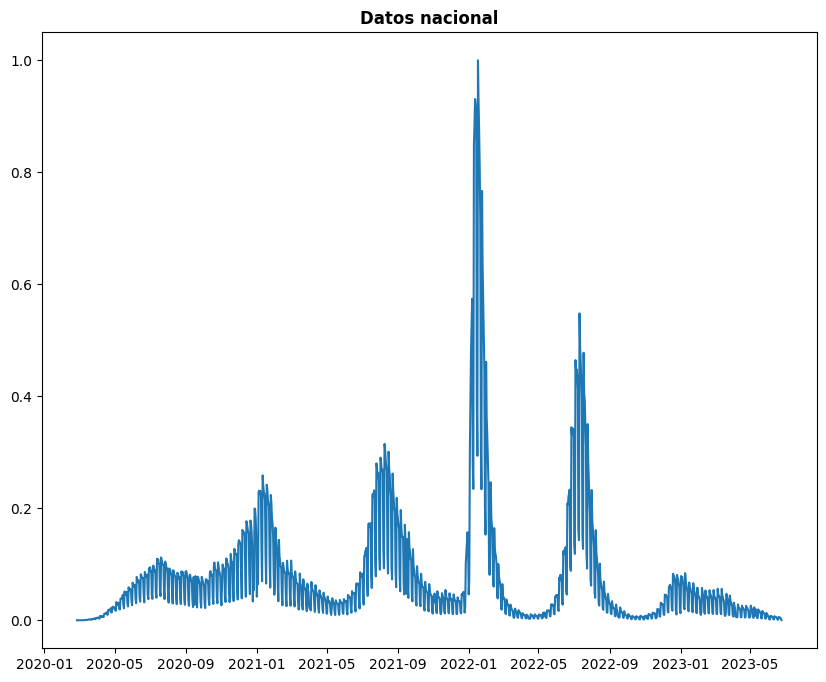

In [107]:
preprocessData = preprocess_data(data)

plt.figure(figsize=(10, 8))
plt.plot(preprocessData['Nacional'])
plt.title('Datos nacional', fontweight='bold')
plt.show()

In [108]:
def pca_Transformation(dataSet):
    features = dataSet
    features = features.drop(['Nacional'], axis=1)

    # principal components analysis
    pca = sk.PCA(n_components=3)
    principalComponents = pca.fit_transform(features)
    principalComp = pd.DataFrame(data = principalComponents,
                                 columns = ['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3'])
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp['Nacional'] = dataSet['Nacional']
    cols = principalComp.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    principalComp = principalComp[cols]

    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    varRatio = (pca.explained_variance_ratio_)*100
    data = {'P. Comp. 1':varRatio[0],'P. Comp. 2':varRatio[1],'P. Comp. 3':varRatio[2]}
    dfVar = pd.DataFrame(data, index=['Exp Var Ratio %'])
    print(dfVar)
    print("\n")

    return principalComp

In [109]:
pcaData = pca_Transformation(preprocessData)
pcaData.head(1215)

                 PCA ANALYSIS
----------------------------------------------------------
            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2023-06-20    0.0055   -0.385418   -0.023980   -0.031617
2023-06-21    0.0050   -0.389817   -0.025970   -0.026036
2023-06-22    0.0048   -0.394643   -0.029628   -0.022447
2023-06-23    0.0026   -0.401546   -0.021571   -0.028535
2023-06-24    0.0002   -0.419864   -0.024882   -0.014331

[1215 rows x 4 columns]


                 P. Comp. 1  P. Comp. 2  P. Comp. 3
Exp Var Ratio %   81.101835    5.824434    3.614026




Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2023-06-20    0.0055   -0.385418   -0.023980   -0.031617
2023-06-21    0.0050   -0.389817   -0.025970   -0.026036
2023-06-22    0.0048   -0.394643   -0.029628   -0.022447
2023-06-23    0.0026   -0.401546   -0.021571   -0.028535
2023-06-24    0.0002   -0.419864   -0.024882   -0.014331

[1215 rows x 4 columns]

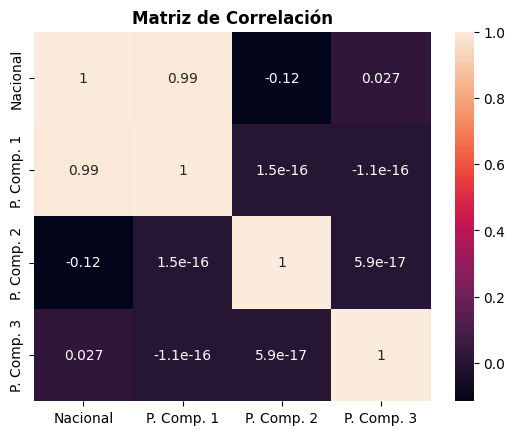

In [110]:
plt.figure()
sns.heatmap(pcaData.corr(), annot=True)
plt.title('Matriz de Correlación', fontweight='bold')
plt.show()
print("")

In [111]:
train_data, test_data = train_test_split(pcaData, test_size=0.25, shuffle=False) #Ya probé con 20, y 30
print(train_data.head(1215))
print("")
print(len(train_data))
print("")
print(test_data.head(1215))
print("")
print(len(test_data))

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2020-02-26    0.0000   -0.420984   -0.025472   -0.013954
2020-02-27    0.0000   -0.420786   -0.025421   -0.013903
2020-02-28    0.0000   -0.420896   -0.025544   -0.013894
2020-02-29    0.0000   -0.420792   -0.025320   -0.014072
2020-03-01    0.0000   -0.420784   -0.025356   -0.013891
...              ...         ...         ...         ...
2022-08-20    0.0210   -0.287385    0.002451    0.002460
2022-08-21    0.0187   -0.293690    0.000125    0.009103
2022-08-22    0.0691   -0.015549    0.005202    0.060701
2022-08-23    0.0507   -0.102404    0.010890    0.055541
2022-08-24    0.0462   -0.132828    0.019228    0.046232

[911 rows x 4 columns]

911

            Nacional  P. Comp. 1  P. Comp. 2  P. Comp. 3
date                                                    
2022-08-25    0.0404   -0.171591    0.015264    0.020806
2022-08-26    0.0362   -0.204175    0.005791    0.015538
2

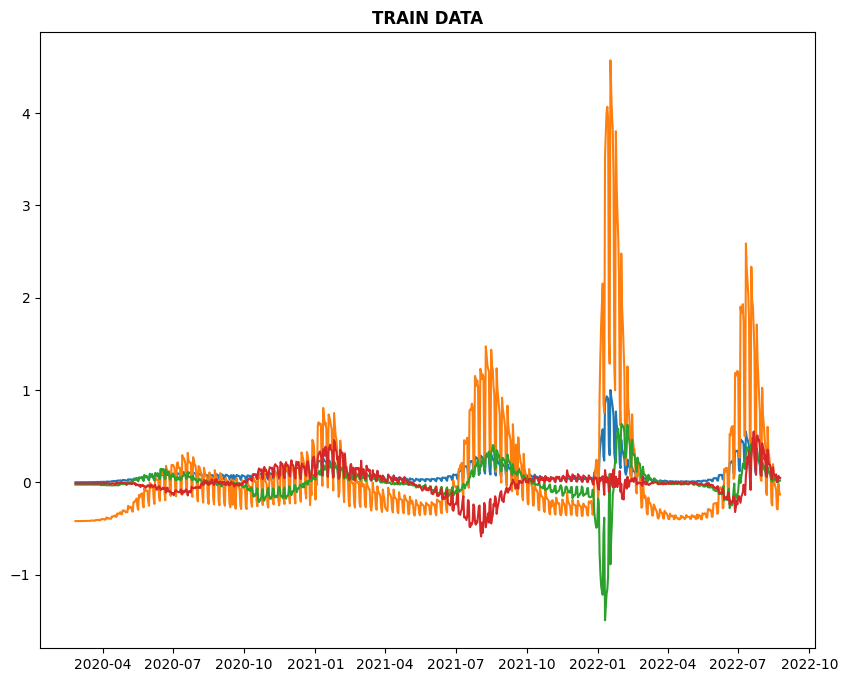

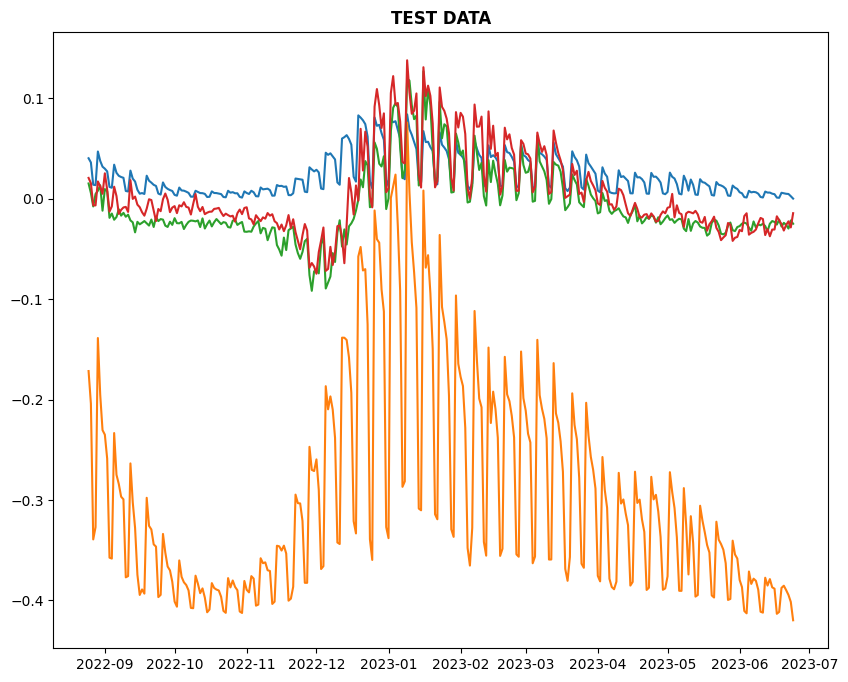

In [112]:
plt.figure(figsize=(10, 8))
plt.plot(train_data)
plt.title('TRAIN DATA', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(test_data)
plt.title('TEST DATA', fontweight='bold')
plt.show()

Modelado del PCA

In [113]:
class Model():
    def __init__(self,model):
        self.model = model
        self.training_data = None
        
    def load_training(self,training_data:pd.Series|list,Expected_results:pd.Series|list[int|float]):
        self.training_data = (training_data,Expected_results)

    def run_training(self):
        if self.training_data is None:
            raise ValueError("No hay datos de entrenamiento cargados. Usa load_training().")
            return False
        self.model.fit(self.training_data[0],self.training_data[1])
        return True
    
    def predict(self,data:pd.Series|list):
        return self.model.predict(data)

    def classification_test_accuracy(self,test_data:pd.Series|list,expected_results:pd.Series|list[int|float]):
        predictions = self.predict(test_data)
        expected_results = list(expected_results)
        results_compare = {"correc_pos":0,"correct_neg":0,"false_pos":0,"false_neg":0}

        for i in range(len(expected_results)):
            is_equal =(predictions[i] == expected_results[i])
            if(is_equal):
                if(predictions[1]):
                    results_compare["correc_pos"] += 1
                else:
                    results_compare["correct_neg"] += 1
            else:
                if(predictions[i]):
                    results_compare["false_pos"] += 1
                else:
                    results_compare["false_neg"] += 1
        
        evals = {"Acur":0,"Press":0,"TPR":0,"F1":0}
        correct = results_compare["correc_pos"]+results_compare["correct_neg"]
        total = len(expected_results)
        try:
            evals["Acur"] = correct/total
        except:
            pass
        try:
            evals["Press"] = results_compare["correc_pos"]/(results_compare["correc_pos"]+results_compare["false_pos"])
        except:
            pass
        try:
            evals["TPR"] = results_compare["correc_pos"]/(results_compare["correc_pos"]+results_compare["false_neg"])
        except:
            pass
        try:
            evals["F1"] = 2*evals["Press"]*evals["TPR"]/(evals["Press"]+evals["TPR"])
        except:
            pass

        
        return evals
    
    def regression_test_accuracy(self,test_data:pd.Series|list,expected_results:pd.Series|list[int|float],k:int|float):
        results = self.model.predict(test_data)
        expected_results = list(expected_results)
        mean = sum(expected_results)/len(expected_results)
        rss = 0
        ssr = 0
        mae = 0
        mape = 0
        for i in range(len(results)):
            rss += (expected_results[i]-results[i])**2
            ssr += (results[i]-mean)**2
            mae += abs(expected_results[i]-results[i]) 
            mape += abs((expected_results[i]-results[i])/expected_results[i])
        if (np.isnan(mape)):
            mape = 0
        tss = rss+ssr
        evaluations = {"TSS":tss,"RSS":rss,"SSR":ssr,"R2":0,"MSE":0,"RMSE":0,
                       "MAPE":0,"MAE":0,"AIC":0,"BIC":0,
                       "TIME SERIES R2":0,"APC":0}
        try:
            evaluations["R2"] = 1-(rss/tss)
        except:
            evaluations["R2"] = np.nan
        try:
            evaluations["MSE"] = rss/len(expected_results)
        except:
            evaluations["MSE"] = np.nan
        try:
            evaluations["MAPE"] = mape*100/len(expected_results)
        except:
            evaluations["MAPE"] = np.nan
        try:
            evaluations["MAE"] = mae/len(expected_results)
        except:
            evaluations["MAE"] = np.nan
        try:
            evaluations["AIC"] = -2*mth.log(rss/len(expected_results))+2*(k)
        except:
            evaluations["AIC"] = np.nan
        try:
            evaluations["BIC"] = (k)*mth.log(len(expected_results))-len(expected_results)*mth.log(rss/len(expected_results))
        except:
            evaluations["BIC"] = np.nan
        try:
            evaluations["APC"] = mth.sqrt(rss)+2*(k)/len(expected_results)
        except:
            evaluations["APC"] = np.nan
        try:
            evaluations["TIME SERIES R2"] = 1-((1-evaluations["R2"])*(len(expected_results)-1)/(len(expected_results)-1-test_data.shape[1]))
        except:
            evaluations["TIME SERIES R2"] = np.nan
        try:
            evaluations["RMSE"] = mth.sqrt(evaluations["MSE"])
        except:
            evaluations["RMSE"] = np.nan
        return evaluations

In [114]:
# === Definición de variables (X e Y) Train y Test===
X_train = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_train = train_data[['Nacional']]  # Objetivo
X_test = test_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]  # Características
Y_test = test_data[['Nacional']]  # Objetivo

# Definición de variables globales (todos los modelos usan el mismo) para evaluación para Train y Test
n_train = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_train)
p_train = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_train)
n_test = len(Y_train["Nacional"])
print("Número de observaciones (n):", n_test)
p_test = len(X_train.columns)  # Número de variables independientes (componentes principales)
print("Número de variables independientes (p):", p_test)

Número de observaciones (n): 911
Número de variables independientes (p): 3
Número de observaciones (n): 911
Número de variables independientes (p): 3


In [115]:
# Decision Tree Regressor
dt_regr = DecisionTreeRegressor()
param_search_dt_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_dt = GridSearchCV(estimator=dt_regr, param_grid=param_search_dt_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_dt.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_dt = grid_search_dt.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_dt)
print("----------------------------------------------------------")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'absolute_error', 'max_depth': 9}
----------------------------------------------------------


In [116]:
# Implementación del Decision Tree Regressor con los mejores parámetros obtenidos por GridSearchCV
dt_optimo = grid_search_dt.best_estimator_
# === Ajustar el modelo RF con los datos de entrenamiento ===
dt_optimo.fit(X_train, Y_train)
# Implementación manual de Decision Tree Regressor
dt_manual = DecisionTreeRegressor(criterion="absolute_error", max_depth=20)  
# === Ajustar el modelo RF con los datos de entrenamiento ===
dt_manual.fit(X_train, Y_train)

# === Predicciones ===
train_pred_dt1 = dt_optimo.predict(X_train)  # Predecir 'Nacional' para train 
test_pred_dt1 = dt_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_dt2 = dt_manual.predict(X_train)  # Predecir 'Nacional' para train (implementación manual)  
test_pred_dt2 = dt_manual.predict(X_test)    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_dt1 = pd.DataFrame(train_pred_dt1, columns=["Nacional"], index=X_train.index)
pred_test_df_dt1 = pd.DataFrame(test_pred_dt1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_dt2 = pd.DataFrame(train_pred_dt2, columns=["Nacional"], index=X_train.index) 
pred_test_df_dt2 = pd.DataFrame(test_pred_dt2, columns=["Nacional"], index=X_test.index)

pred_train_df_dt1.columns = ["Nacional"]
pred_test_df_dt1.columns = ["Nacional"]
#Manual
pred_train_df_dt2.columns = ["Nacional"]
pred_test_df_dt2.columns = ["Nacional"]

# Datos de mi arbol de decisión
n_leaves_dt = dt_optimo.tree_.n_leaves
n_nodes_dt = dt_optimo.tree_.node_count

print(f"Número de hojas (leaves): {n_leaves_dt}")
print(f"Número total de nodos: {n_nodes_dt}")
print(f"Profundidad del árbol: {dt_optimo.get_depth()}")

Número de hojas (leaves): 304
Número total de nodos: 607
Profundidad del árbol: 9


In [117]:
# Calculo de residuales y errores relativos para Random Forest
dt_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_dt1["Nacional"]
})
# Creo un dataframe con los resultados
dt_train_results["Residuals"] = dt_train_results["Real Nacional"] - dt_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
dt_train_results["Rel. Error"] = (1 - (dt_train_results["Pred. Nacional"] / dt_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
dt_test_pred = pred_test_df_dt1["Nacional"]
dt_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": dt_test_pred
})
dt_test_results["Residuals"] = dt_test_results["Real Nacional"] - dt_test_results["Pred. Nacional"]
dt_test_results["Rel. Error"] = (1 - (dt_test_results["Pred. Nacional"] / dt_test_results["Real Nacional"])).abs()

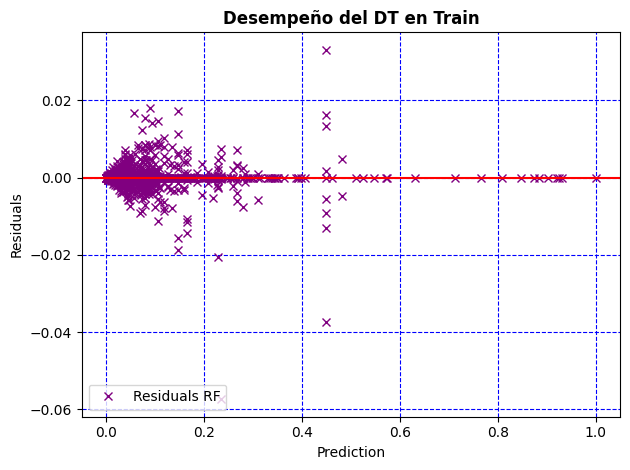

In [118]:
plt.figure()
plt.plot(dt_train_results['Pred. Nacional'], dt_train_results['Residuals'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del DT en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

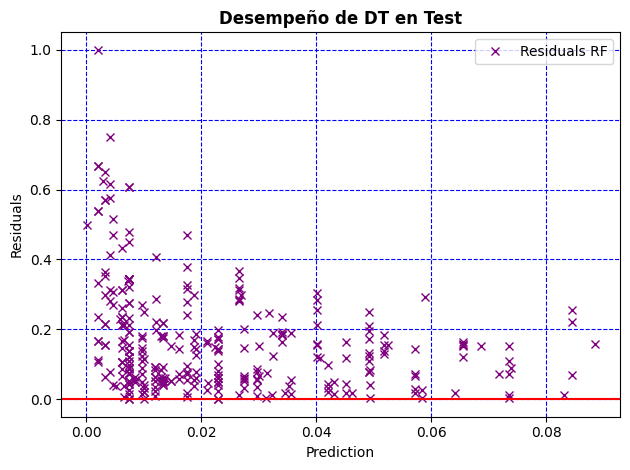

In [119]:
plt.figure()
plt.plot(dt_test_results['Pred. Nacional'], dt_test_results['Rel. Error'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de DT en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [120]:
# Métricas de evaluación para Decision Tree Regressor
dt_model = Model(dt_optimo)

# Carga de training data (X_train, Y_train)
dt_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
dt_model.run_training()

# PRedicciones para train y test
train_pred_dt = dt_model.predict(X_train)
test_pred_dt = dt_model.predict(X_test)

k_dt = dt_optimo.tree_.node_count - n_leaves_dt # Estimación de k para DT, otorgada por el profesor
# Resultados de metricas de train y test
train_metrics_dt = dt_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_dt)
test_metrics_dt = dt_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_dt)

print("Train metrics:", train_metrics_dt)
print("Test metrics:", test_metrics_dt)    

Train metrics: {'TSS': np.float64(14.897312614072456), 'RSS': np.float64(0.014626345000000002), 'SSR': np.float64(14.882686269072456), 'R2': np.float64(0.9990181890265105), 'MSE': np.float64(1.6055263446761803e-05), 'RMSE': 0.004006901976185816, 'MAPE': 0.0, 'MAE': np.float64(0.0017126234906695923), 'AIC': np.float64(628.0789476430816), 'BIC': np.float64(12121.76714929344), 'TIME SERIES R2': np.float64(0.9990149415811738), 'APC': np.float64(0.7861425005327862)}
Test metrics: {'TSS': np.float64(0.13537048190789477), 'RSS': np.float64(0.008606732500000009), 'SSR': np.float64(0.12676374940789475), 'R2': np.float64(0.9364209066947403), 'MSE': np.float64(2.8311620065789503e-05), 'RMSE': 0.005320866476974356, 'MAPE': np.float64(16.98165044082033), 'MAE': np.float64(0.003105756578947368), 'AIC': np.float64(626.944476469116), 'BIC': np.float64(4915.819816831719), 'TIME SERIES R2': np.float64(0.9357851157616877), 'APC': np.float64(2.0861935296923972)}


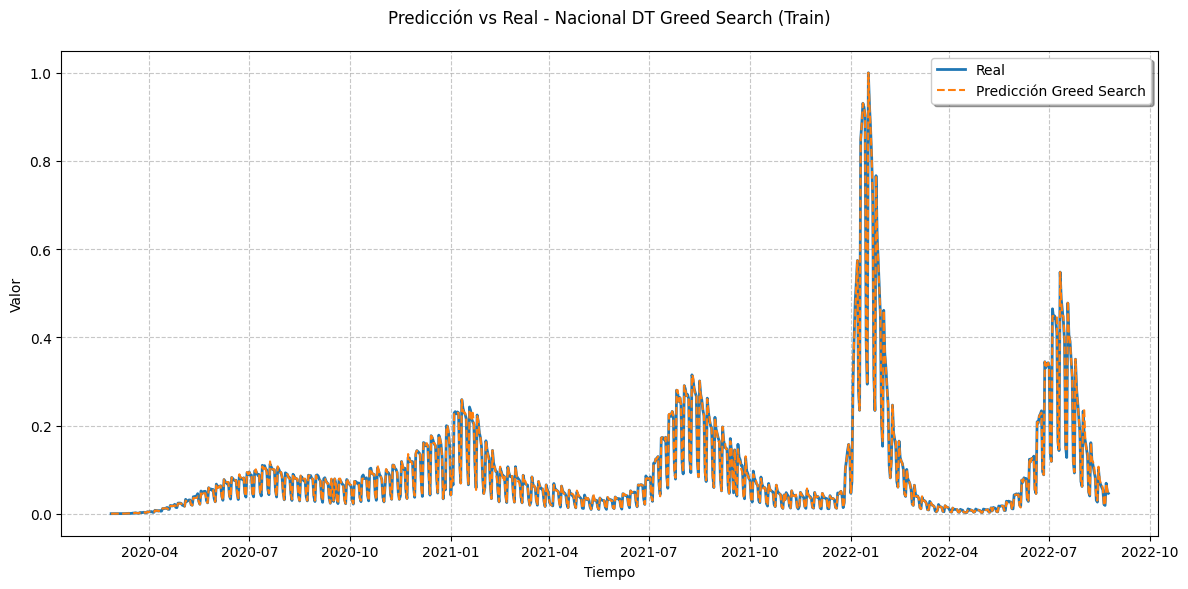

In [121]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_dt1.index, pred_train_df_dt1.values, label="Predicción Greed Search", linestyle="--") 
plt.title("Predicción vs Real - Nacional DT Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

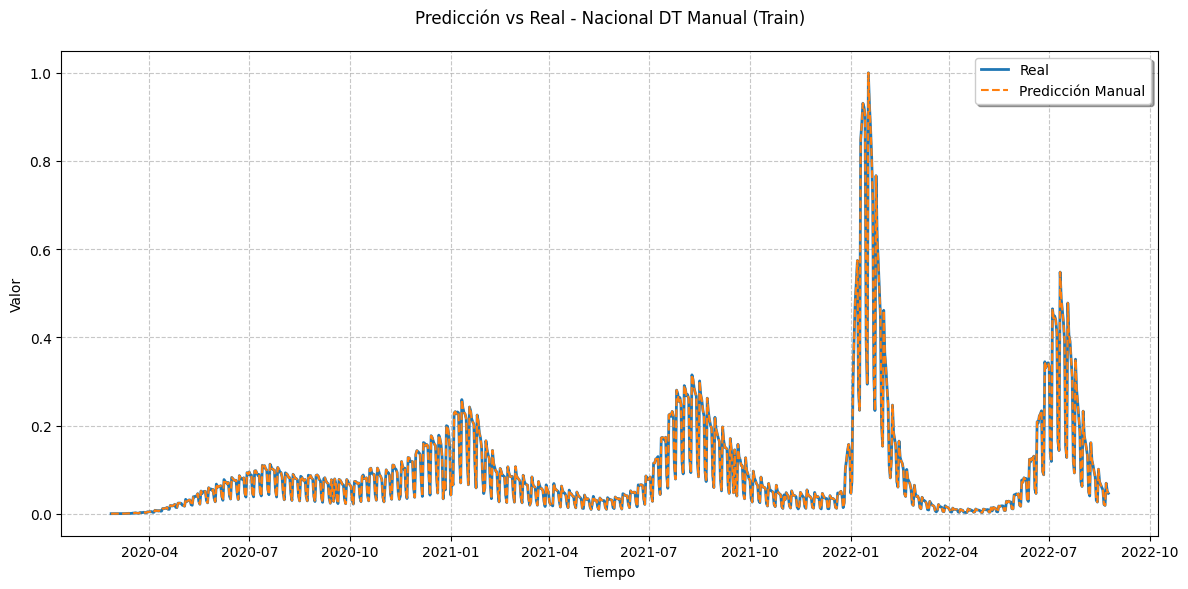

In [122]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2) 
plt.plot(pred_train_df_dt2.index, pred_train_df_dt2.values, label="Predicción Manual", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

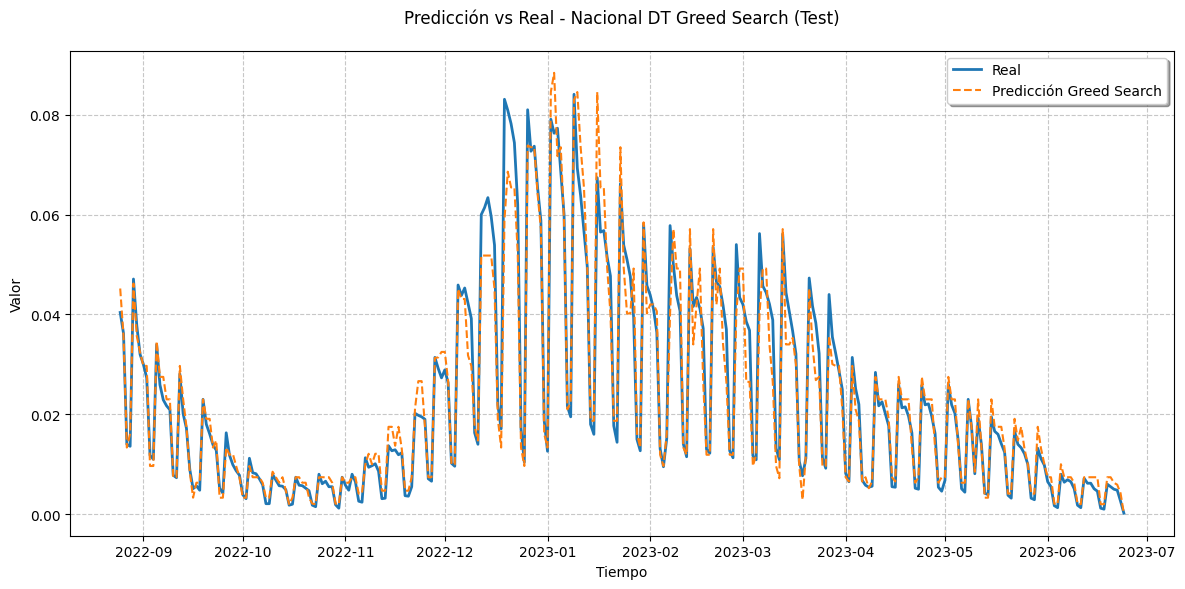

In [123]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_dt1.index, pred_test_df_dt1.values, label="Predicción Greed Search", linestyle="--")
plt.title("Predicción vs Real - Nacional DT Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

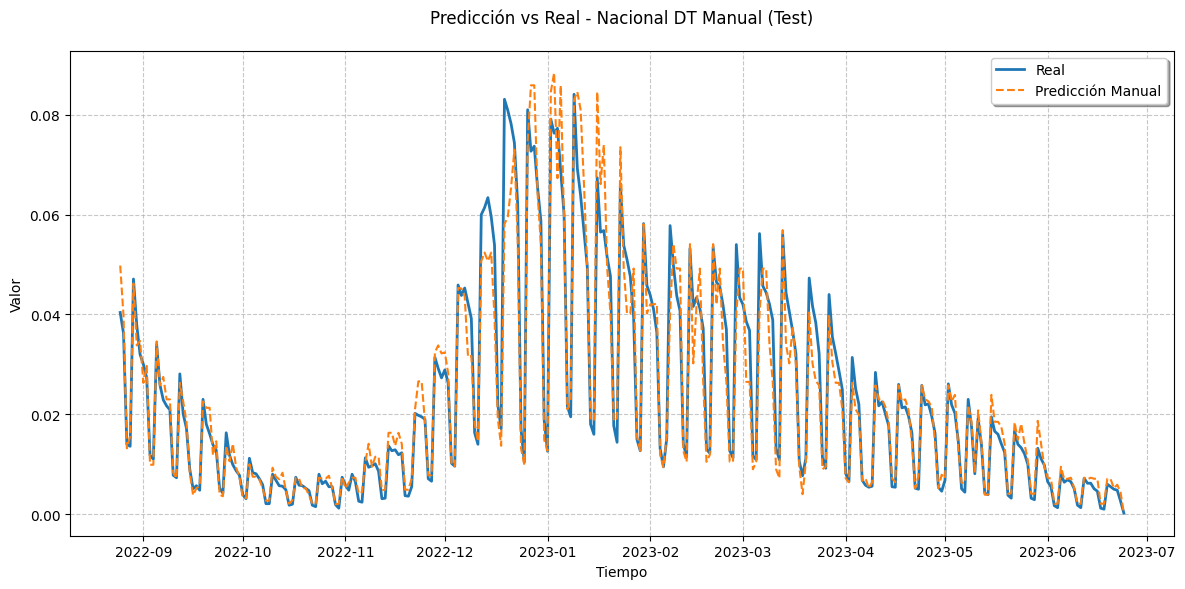

In [124]:
#Grafica de la predicción vs real DT
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2) 
plt.plot(pred_test_df_dt2.index, pred_test_df_dt2.values, label="Predicción Manual", linestyle="--")  
plt.title("Predicción vs Real - Nacional DT Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [125]:
# Random forest
rf_regr = RandomForestRegressor()
param_search_rf_regr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'], #Puedo añadir 'friedman_mse',
    'n_estimators': [10, 50, 100, 200, None], # Puedo probar con [10, 50, 100, 200, 500]
    'max_depth': [3, 5, 7, 9, 15, 20, None]
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_rf = GridSearchCV(estimator=rf_regr, param_grid=param_search_rf_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_rf.fit(X, y)  # Entreno el modelo con la columna 'Nacional' como característica y los componentes principales como objetivo
best_params_rf = grid_search_rf.best_params_

print("==========================================================")
print("Mejores parámetros para Decision Tree Regressor:")
print(best_params_rf)
print("----------------------------------------------------------")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Mejores parámetros para Decision Tree Regressor:
{'criterion': 'poisson', 'max_depth': None, 'n_estimators': 10}
----------------------------------------------------------


In [126]:
# Implementación del Random Forest Regressor con los mejores parámetros obtenidos por GridSearchCV
rf_optimo = grid_search_rf.best_estimator_
# === Ajustar el modelo RF con los datos de entrenamiento ===
rf_optimo.fit(X_train, Y_train)
# Implementación manual de Random Forest Regressor
rf_manual = RandomForestRegressor(criterion="absolute_error", n_estimators=47, max_depth=19)  # Implementación manual
# === Ajustar el modelo RF con los datos de entrenamiento ===
rf_manual.fit(X_train, Y_train)

# === Predicciones ===
train_pred_rf1 = rf_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_r1 = rf_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_rf2 = rf_manual.predict(X_train)  # Predecir 'Nacional' para train (implementación manual)
test_pred_r2 = rf_manual.predict(X_test)    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_rf1 = pd.DataFrame(train_pred_rf1, columns=["Nacional"], index=X_train.index)
pred_test_df_rf1 = pd.DataFrame(test_pred_r1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_rf2 = pd.DataFrame(train_pred_rf2, columns=["Nacional"], index=X_train.index)
pred_test_df_rf2 = pd.DataFrame(test_pred_r2, columns=["Nacional"], index=X_test.index)

pred_train_df_rf1.columns = ["Nacional"]
pred_test_df_rf1.columns = ["Nacional"]
#Manual
pred_train_df_rf2.columns = ["Nacional"]
pred_test_df_rf2.columns = ["Nacional"]

# Calcular estadísticas de los árboles individuales en el Random Forest
n_leaves_rf = [est.tree_.n_leaves for est in rf_optimo.estimators_]
n_nodes_rf = [est.tree_.node_count for est in rf_optimo.estimators_]
depths_rf = [est.get_depth() for est in rf_optimo.estimators_]

print(f"Número promedio de hojas (leaves): {np.mean(n_leaves_rf):.2f}")
print(f"Número promedio de nodos: {np.mean(n_nodes_rf):.2f}")
print(f"Profundidad promedio del árbol: {np.mean(depths_rf):.2f}")

Número promedio de hojas (leaves): 557.50
Número promedio de nodos: 1114.00
Profundidad promedio del árbol: 17.10


In [127]:
# Calculo de residuales y errores relativos para Random Forest
rf_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_rf1["Nacional"]
})
# Creo un dataframe con los resultados
rf_train_results["Residuals"] = rf_train_results["Real Nacional"] - rf_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
rf_train_results["Rel. Error"] = (1 - (rf_train_results["Pred. Nacional"] / rf_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
rf_test_pred = pred_test_df_rf1["Nacional"]
rf_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": rf_test_pred
})
rf_test_results["Residuals"] = rf_test_results["Real Nacional"] - rf_test_results["Pred. Nacional"]
rf_test_results["Rel. Error"] = (1 - (rf_test_results["Pred. Nacional"] / rf_test_results["Real Nacional"])).abs()

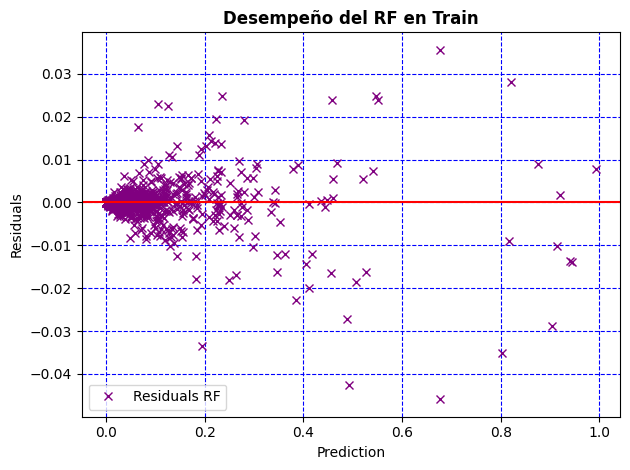

In [128]:
plt.figure()
plt.plot(rf_train_results['Pred. Nacional'], rf_train_results['Residuals'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del RF en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

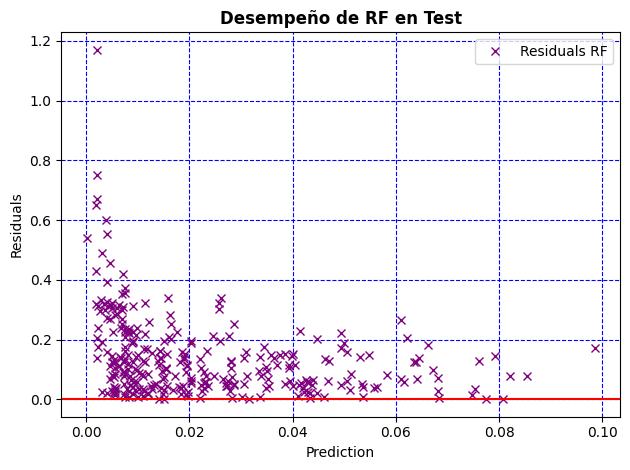

In [129]:
plt.figure()
plt.plot(rf_test_results['Pred. Nacional'], rf_test_results['Rel. Error'], 'x', color='purple', label='Residuals RF') #Random Forest 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de RF en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [130]:
# Metricas de evaluación para Random Forest Regressor
rf_model = Model(rf_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
rf_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
rf_model.run_training()

# PRedicciones para train y test
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

k_rf = sum([nodes - leaves for nodes, leaves in zip(n_nodes_rf, n_leaves_rf)]) # Estimación de k para Rf, adaptada a la que el profesor mencionó
# Resultados de metricas de train y test
train_metrics_rf = rf_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_rf)
test_metrics_rf = rf_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_rf)

print("Train metrics:", train_metrics_rf)
print("Test metrics:", test_metrics_rf)   

Train metrics: {'TSS': np.float64(14.971480468540152), 'RSS': np.float64(0.03296268251386959), 'SSR': np.float64(14.938517786026283), 'R2': np.float64(0.9977983017388872), 'MSE': np.float64(3.6182966535531935e-05), 'RMSE': 0.0060152278872484906, 'MAPE': np.float64(inf), 'MAE': np.float64(0.0025708071716062917), 'AIC': np.float64(11150.453844175125), 'BIC': np.float64(47239.657245021226), 'TIME SERIES R2': np.float64(0.9977910193852121), 'APC': np.float64(12.398899857676703)}
Test metrics: {'TSS': np.float64(0.12675397285431186), 'RSS': np.float64(0.004541985449226755), 'SSR': np.float64(0.1222119874050851), 'R2': np.float64(0.9641669184251352), 'MSE': np.float64(1.4940741609298535e-05), 'RMSE': 0.0038653255502348743, 'MAPE': np.float64(14.88463279568803), 'MAE': np.float64(0.0024415048558897247), 'AIC': np.float64(11152.22283748063), 'BIC': np.float64(35193.130455381375), 'TIME SERIES R2': np.float64(0.9638085876093866), 'APC': np.float64(36.6792363590926)}


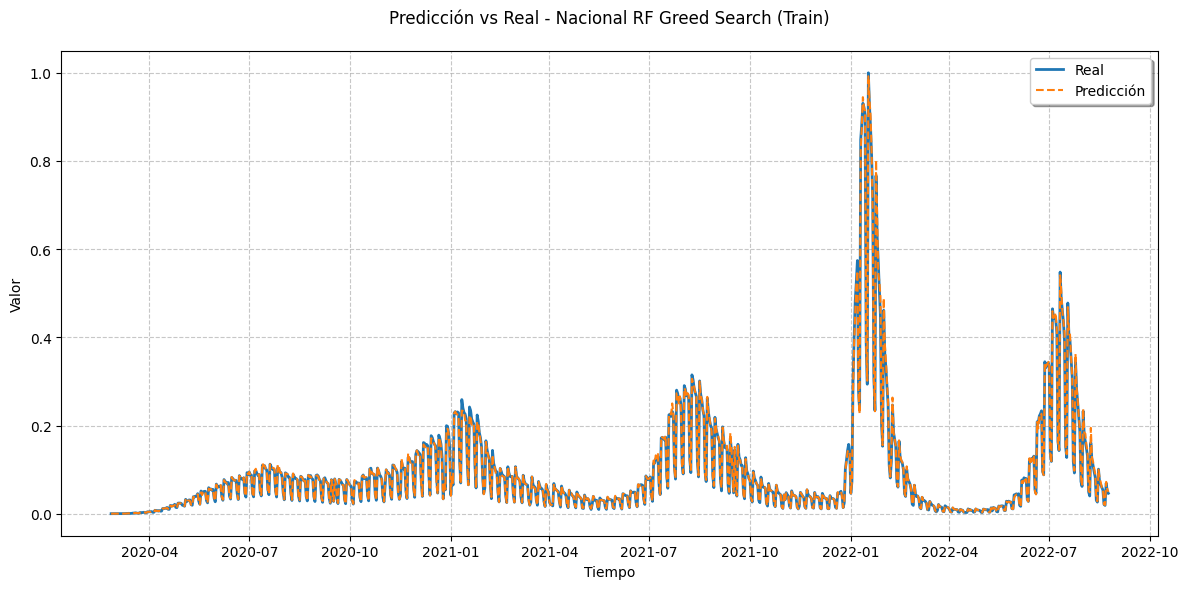

In [131]:
#Grafica de la predicción vs real RF Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_rf1.index, pred_train_df_rf1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

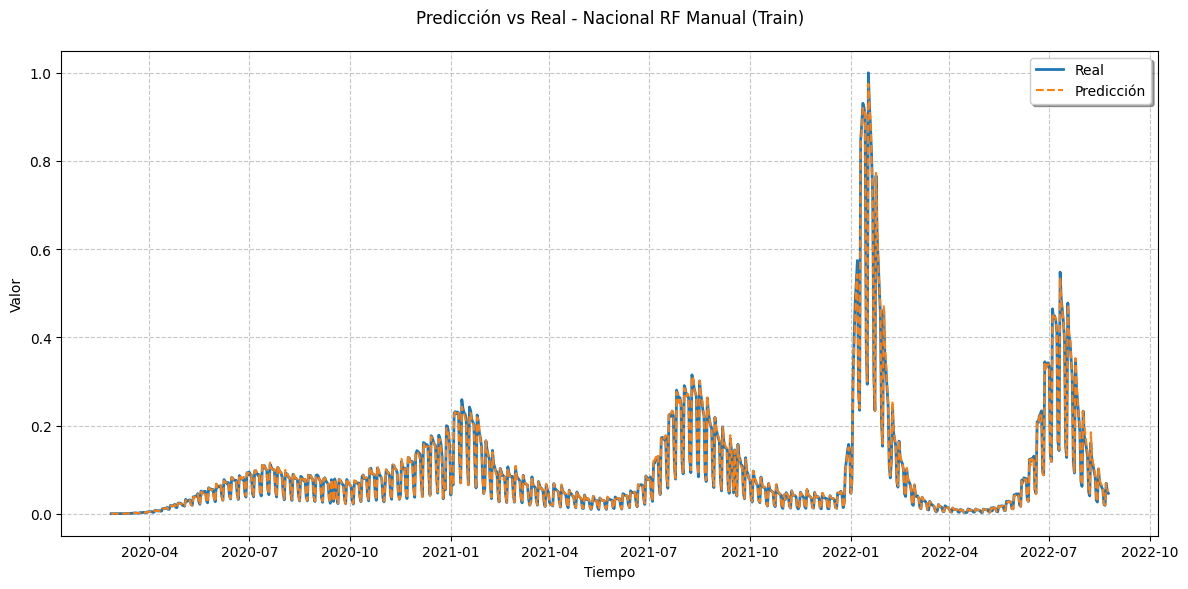

In [132]:
#Grafica de la predicción vs real RF Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_rf2.index, pred_train_df_rf2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

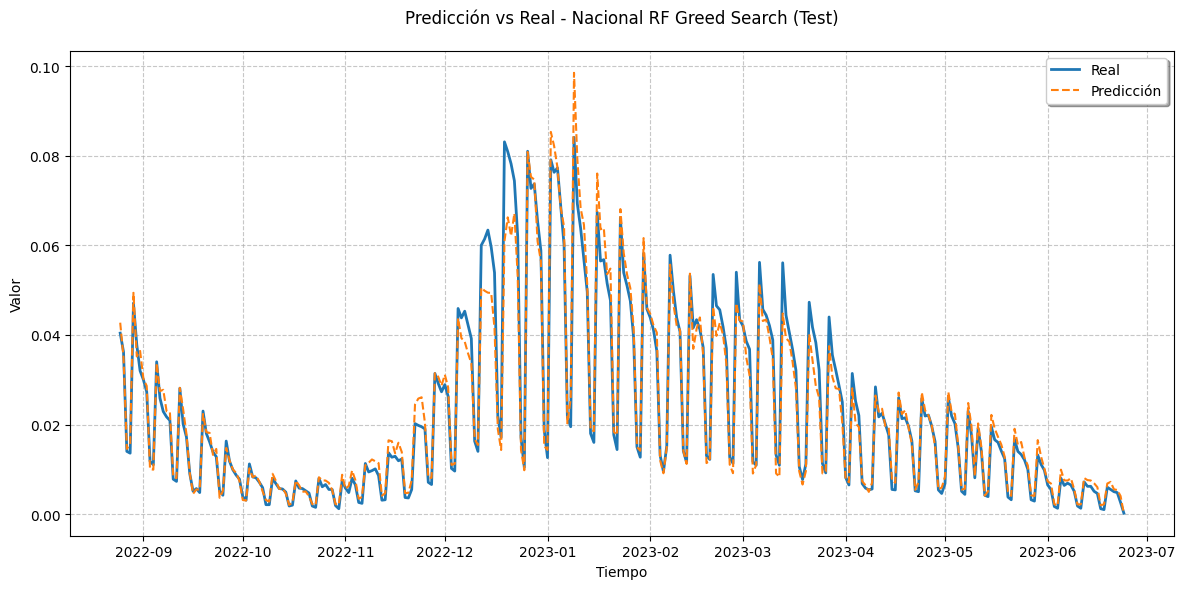

In [133]:
#Grafica de la predicción vs real RF Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_rf1.index, pred_test_df_rf1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

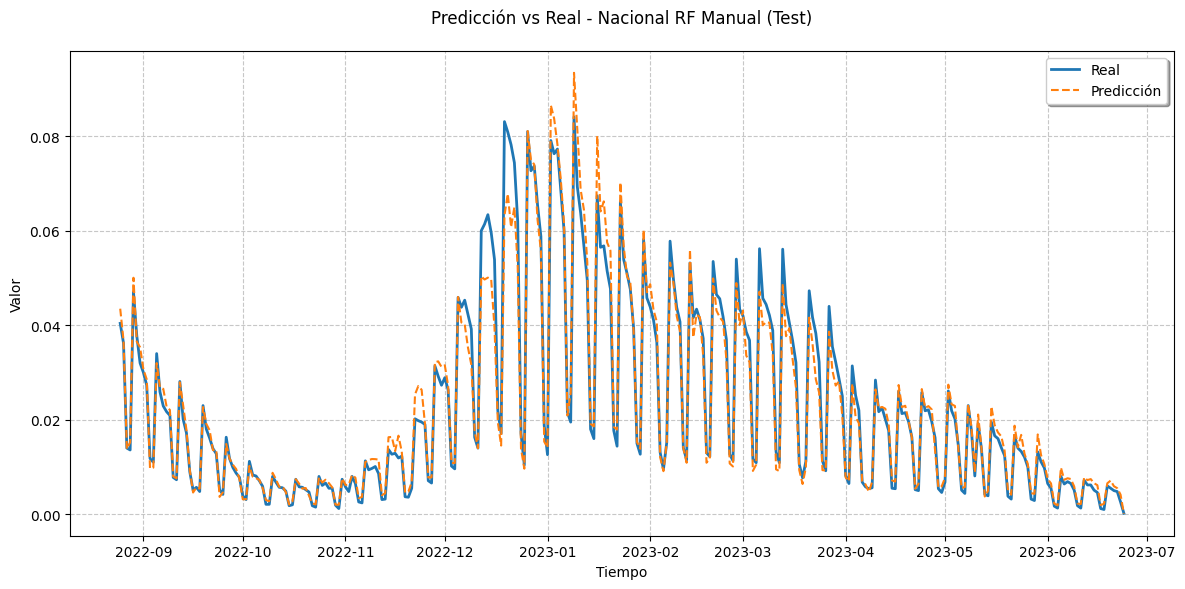

In [134]:
#Grafica de la predicción vs real RF Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_rf2.index, pred_test_df_rf2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional RF Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [135]:
# Support Vector Machine
svm_regr = svm.SVR()
param_search_svm_regr = {
    'kernel': ['rbf', 'poly', 'sigmoid'],# , 'poly', 'rbf', 'sigmoid' linear
    'degree': [2, 3, 4, 5],  # 3, 4, 5, 6
    'gamma': ['scale', 'auto'],
    'epsilon': [0.005, 0.05, 0.1, 0.2, 0.5],
    'max_iter': [-1]# Número máximo de iteraciones
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y Y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

grid_search_svm = GridSearchCV(estimator=svm_regr, param_grid=param_search_svm_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_svm.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_svm = grid_search_svm.best_params_

print("==========================================================")
print("Mejores parámetros para Support Vector Machine Regressor:")
print(best_params_svm)
print("----------------------------------------------------------")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Mejores parámetros para Support Vector Machine Regressor:
{'degree': 2, 'epsilon': 0.005, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}
----------------------------------------------------------


In [136]:
# Implementación del Support Vector Machine Regressor con los mejores parámetros obtenidos por GridSearchCV
svm_optimo = grid_search_svm.best_estimator_
# === Ajustar el modelo SVM con los datos de entrenamiento ===
svm_optimo.fit(X_train, Y_train)
# Implementación del Support Vector Machine Regressor con los mejores parámetros obtenidos por GridSearchCV
svm_manual = svm.SVR(kernel='rbf', degree=3, gamma='scale', epsilon=0.05, max_iter=-1)  # Implementación manual
# === Ajustar el modelo SVM con los datos de entrenamiento ===
svm_manual.fit(X_train, Y_train)

# === Predicciones ===
train_pred_svm1 = svm_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_svm1 = svm_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_svm2 = svm_manual.predict(X_train)  # Predecir 'Nacional' para train (implementación manual)
test_pred_svm2 = svm_manual.predict(X_test)    # Predecir 'Nacional' para test (implementación manual)


# === Convertir a DataFrames para análisis ===
pred_train_df_svm1 = pd.DataFrame(train_pred_svm1, columns=["Nacional"], index=X_train.index)
pred_test_df_svm1 = pd.DataFrame(test_pred_svm1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_svm2 = pd.DataFrame(train_pred_svm2, columns=["Nacional"], index=X_train.index)
pred_test_df_svm2 = pd.DataFrame(test_pred_svm2, columns=["Nacional"], index=X_test.index)

pred_train_df_svm1.columns = ["Nacional"]
pred_test_df_svm1.columns = ["Nacional"]
#Manual
pred_train_df_svm2.columns = ["Nacional"]
pred_test_df_svm2.columns = ["Nacional"]

In [137]:
# Calculo de residuales y errores relativos para Support Vector Machine
svm_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_svm1["Nacional"]
})
# Creo un dataframe con los resultados
svm_train_results["Residuals"] = svm_train_results["Real Nacional"] - svm_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
svm_train_results["Rel. Error"] = (1 - (svm_train_results["Pred. Nacional"] / svm_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
svm_test_pred = pred_test_df_svm1["Nacional"]
svm_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": svm_test_pred
})
svm_test_results["Residuals"] = svm_test_results["Real Nacional"] - svm_test_results["Pred. Nacional"]
svm_test_results["Rel. Error"] = (1 - (svm_test_results["Pred. Nacional"] / svm_test_results["Real Nacional"])).abs()

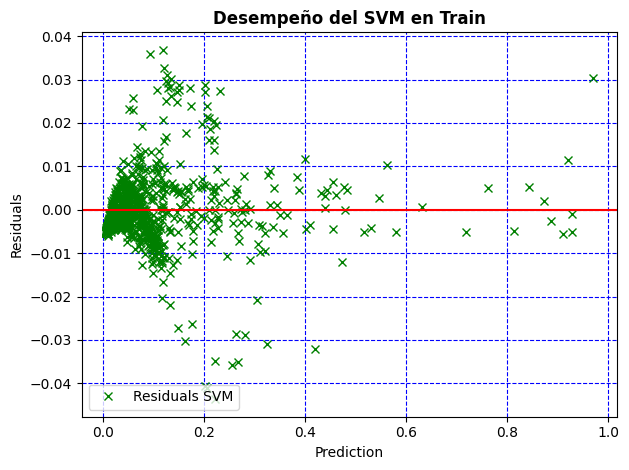

In [138]:
plt.figure()
plt.plot(svm_train_results['Pred. Nacional'], svm_train_results['Residuals'], 'x', color='green', label='Residuals SVM')  
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del SVM en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

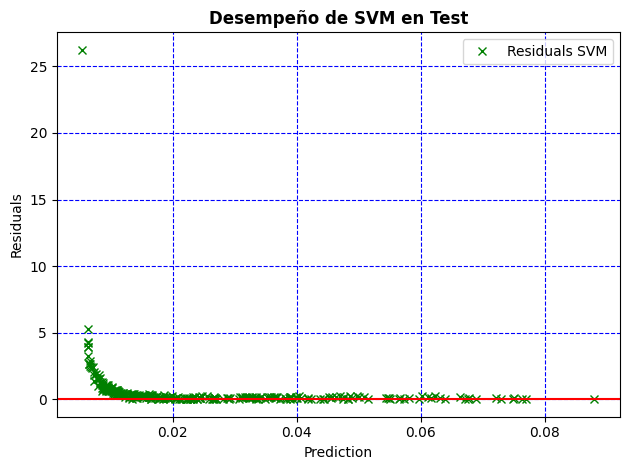

In [139]:
plt.figure()
plt.plot(svm_test_results['Pred. Nacional'], svm_test_results['Rel. Error'], 'x', color='green', label='Residuals SVM') 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de SVM en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [140]:
# Metricas de evaluación para Support Vector Machine Regressor
svm_model = Model(svm_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
svm_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
svm_model.run_training()

# PRedicciones para train y test
train_pred_svm = svm_model.predict(X_train)
test_pred_svm = svm_model.predict(X_test)

k_svm = len(svm_optimo.support_vectors_) # Estimación de k para SVM, otorgada por el profesor
# Resultados de metricas de train y test
train_metrics_svm = svm_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=k_svm)
test_metrics_svm = svm_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=k_svm)

print("Train metrics:", train_metrics_svm)
print("Test metrics:", test_metrics_svm)  

Train metrics: {'TSS': np.float64(14.755372095961423), 'RSS': np.float64(0.062173882623258354), 'SSR': np.float64(14.693198213338166), 'R2': np.float64(0.9957863561678478), 'MSE': np.float64(6.82479501901848e-05), 'RMSE': 0.008261231759863949, 'MAPE': np.float64(inf), 'MAE': np.float64(0.005298629512831529), 'AIC': 585.1847263163874, 'BIC': 10667.158477039007, 'TIME SERIES R2': np.float64(0.9957724190879179), 'APC': 0.8706421921113499}
Test metrics: {'TSS': np.float64(0.09818617778178937), 'RSS': np.float64(0.006522584834108625), 'SSR': np.float64(0.09166359294768074), 'R2': np.float64(0.9335692153267792), 'MSE': np.float64(2.1455871164831002e-05), 'RMSE': 0.004632048268836477, 'MAPE': np.float64(55.35672110036979), 'MAE': np.float64(0.0037655746575134853), 'AIC': 587.4990244721299, 'BIC': 4885.770559261706, 'TIME SERIES R2': np.float64(0.932904907480047), 'APC': 1.9426046264850008}


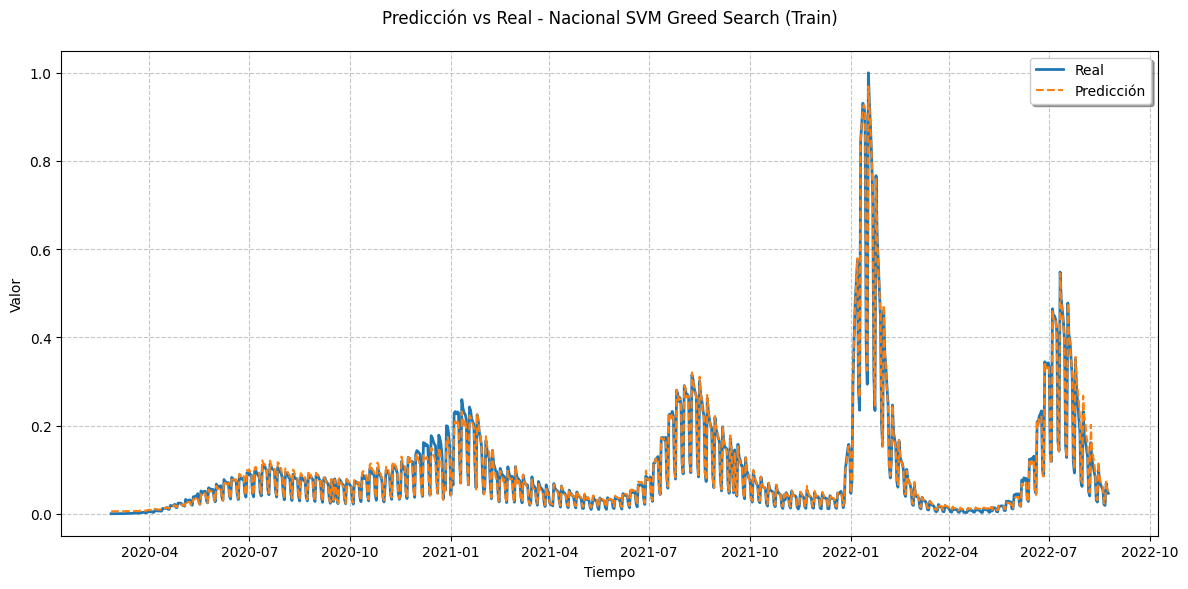

In [141]:
#Grafica de la predicción vs real SVM Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_svm1.index, pred_train_df_svm1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

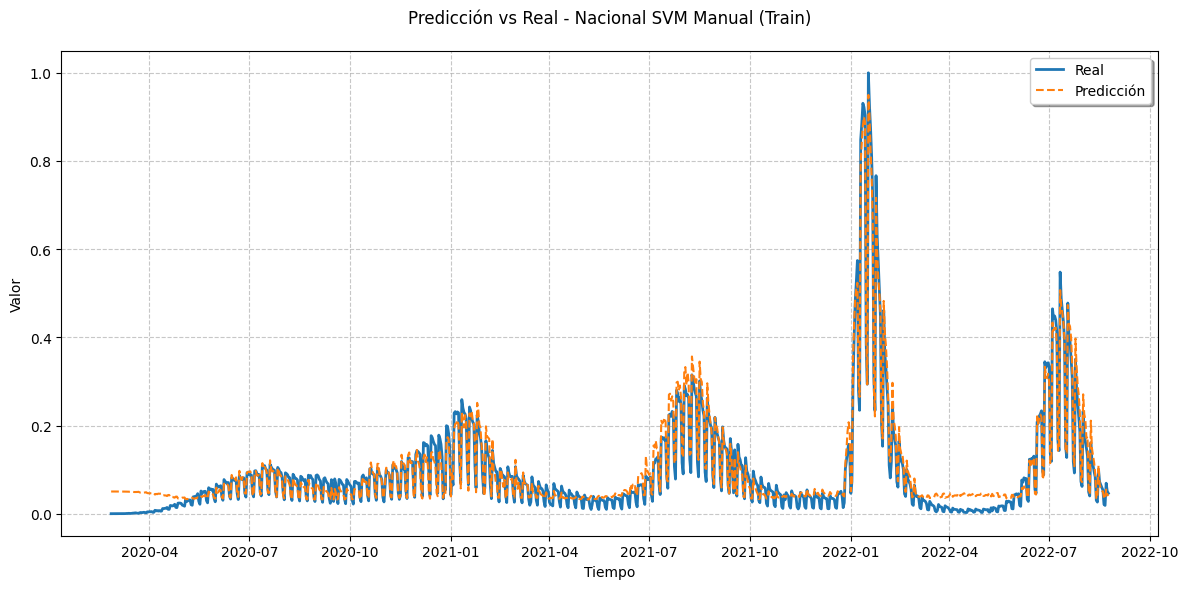

In [142]:
#Grafica de la predicción vs real SVM Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_svm2.index, pred_train_df_svm2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

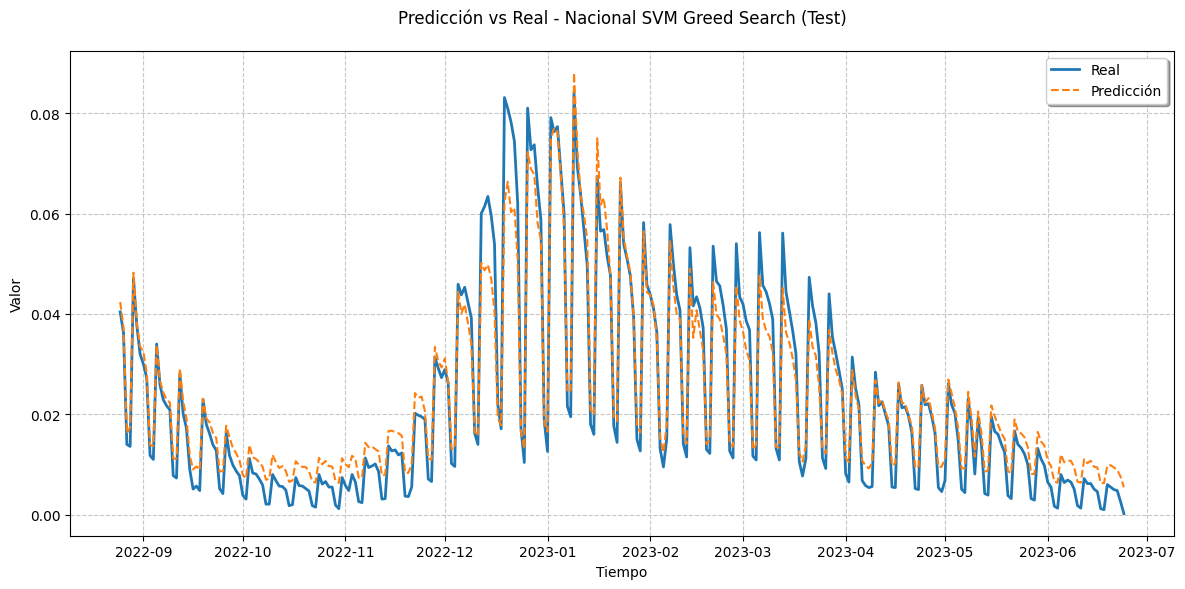

In [143]:
#Grafica de la predicción vs real SVM Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_svm1.index, pred_test_df_svm1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

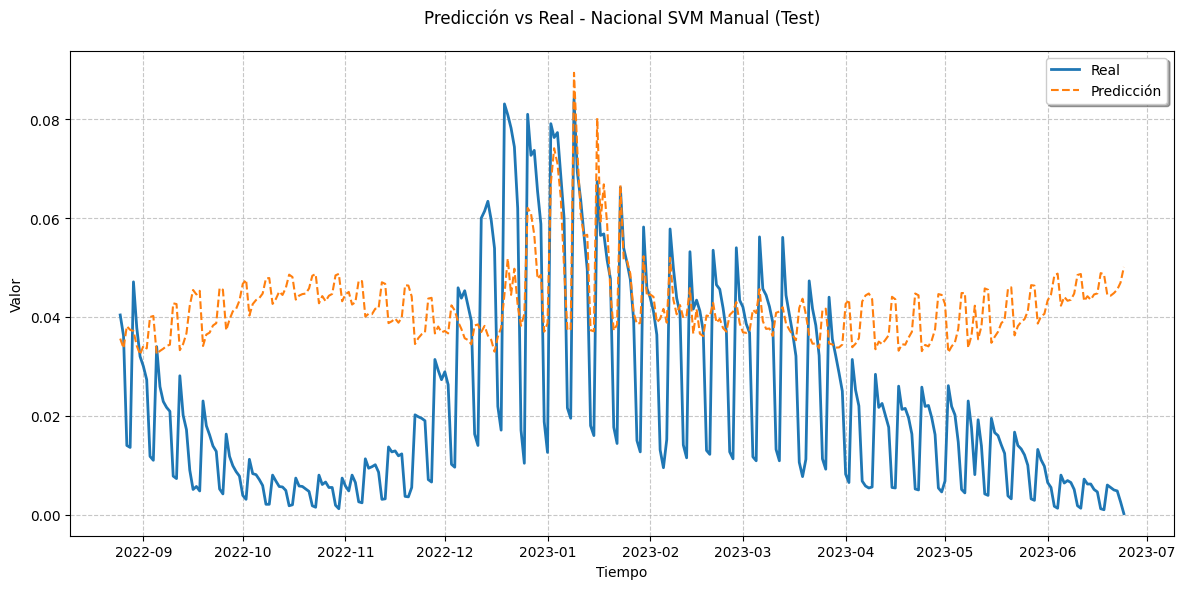

In [144]:
#Grafica de la predicción vs real SVM Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_svm2.index, pred_test_df_svm2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional SVM Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [145]:
# Multi-layer Perceptron Regressor
mlp_regr = MLPRegressor()
param_search_mlp_regr = {
    'random_state': [1, None],  # Fijo el estado aleatorio para reproducibilidad
    'max_iter': [1000, 2000, 3000],  # Puedo probar con [1000, 2000, 3000, 4000]
    'tol': [0.01, 0.1, 0.2],  # Puedo probar con [0.01, 0.05, 0.1, 0.2]
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Puedo probar con [(50,), (100,), (150,), (200,), (250,)]
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Puedo probar con ['constant', 'invscaling', 'adaptive']
}

# Utilizo GridSearchCV para encontrar los mejores parámetros
# Definir X (característica) y y (objetivo)
X = train_data[['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3']]
y = train_data[['Nacional']]

# Le paso este objeto a la funcion de model_template y tambien le paso X Y
grid_search_mlp = GridSearchCV(estimator=mlp_regr, param_grid=param_search_mlp_regr, n_jobs=-1, cv=5, verbose=1)
grid_search_mlp.fit(X, y)  # Entreno el modelo con los componentes principales como característica y la columna 'Nacional' como objetivo
best_params_mlp = grid_search_mlp.best_params_

print("==========================================================")
print("Mejores parámetros para Multi-layer Perceptron Regressor:")
print(best_params_mlp)
print("----------------------------------------------------------")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros para Multi-layer Perceptron Regressor:
{'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'max_iter': 2000, 'random_state': None, 'tol': 0.1}
----------------------------------------------------------


In [146]:
# Implementación del Multi-layer Perceptron Regressor con los mejores parámetros obtenidos por GridSearchCV
mlp_optimo = grid_search_mlp.best_estimator_
# === Ajustar el modelo MLP con los datos de entrenamiento ===
mlp_optimo.fit(X_train, Y_train)
# Implementación manual de Multi-layer Perceptron Regressor
mlp_manual = MLPRegressor(random_state=1, max_iter=1000, tol=0.01, hidden_layer_sizes=(100,), learning_rate='constant')  # Implementación manual
# === Ajustar el modelo MLP con los datos de entrenamiento ===
mlp_manual.fit(X_train, Y_train)

# === Predicciones ===
train_pred_mlp1 = mlp_optimo.predict(X_train)  # Predecir 'Nacional' para train
test_pred_mlp1 = mlp_optimo.predict(X_test)    # Predecir 'Nacional' para test
train_pred_mlp2 = mlp_manual.predict(X_train)  # Predecir 'Nacional' para train (implementación manual)
test_pred_mlp2 = mlp_manual.predict(X_test)    # Predecir 'Nacional' para test (implementación manual)

# === Convertir a DataFrames para análisis ===
pred_train_df_mlp1 = pd.DataFrame(train_pred_mlp1, columns=["Nacional"], index=X_train.index)
pred_test_df_mlp1 = pd.DataFrame(test_pred_mlp1, columns=["Nacional"], index=X_test.index)
#Manual
pred_train_df_mlp2 = pd.DataFrame(train_pred_mlp2, columns=["Nacional"], index=X_train.index)
pred_test_df_mlp2 = pd.DataFrame(test_pred_mlp2, columns=["Nacional"], index=X_test.index)

pred_train_df_mlp1.columns = ["Nacional"]
pred_test_df_mlp1.columns = ["Nacional"]
#Manual
pred_train_df_mlp2.columns = ["Nacional"]
pred_test_df_mlp2.columns = ["Nacional"]

In [147]:
# Función para analizar el tamaño de la red neuronal MLP para saber cuando mide su k
def analyze_network_size(mlp_model):
    """
    Analisis del tamaño de una red neuronal MLP y la categoriza en pequeña, mediana o grande.
    """
    # Get network parameters
    n_layers = len(mlp_model.coefs_)
    n_neurons = [layer.shape[0] for layer in mlp_model.coefs_]
    total_params = sum(layer.size for layer in mlp_model.coefs_)
    
    # Size categorization
    if total_params < 1000:
        size_category = "Pequeña"
    elif total_params < 100000:
        size_category = "Mediana"
    else:
        size_category = "Grande"
    
    print(f"Arquitectura de la Red Neuronal:")
    print(f"Número de capas: {n_layers}")
    print(f"Neuronas por capa: {n_neurons}")
    print(f"Total de parámetros: {total_params:,}")
    print(f"Categoría de la red en base a su tamaño: {size_category}")
    
# Use after training your model
analyze_network_size(mlp_optimo)

Arquitectura de la Red Neuronal:
Número de capas: 2
Neuronas por capa: [3, 100]
Total de parámetros: 400
Categoría de la red en base a su tamaño: Pequeña


In [148]:
# Calculo de residuales y errores relativos para Support Vector Machine
mlp_train_results = pd.DataFrame({
    "Real Nacional": train_data["Nacional"],
    "Pred. Nacional": pred_train_df_mlp1["Nacional"]
})
# Creo un dataframe con los resultados
mlp_train_results["Residuals"] = mlp_train_results["Real Nacional"] - mlp_train_results["Pred. Nacional"]
# Residuos diferencia entre valor real y valor predicho (error del modelo).
mlp_train_results["Rel. Error"] = (1 - (mlp_train_results["Pred. Nacional"] / mlp_train_results["Real Nacional"])).abs()
# Datos de prueba (test)
mlp_test_pred = pred_test_df_mlp1["Nacional"]
mlp_test_results = pd.DataFrame({
    "Real Nacional": test_data["Nacional"],
    "Pred. Nacional": mlp_test_pred
})
mlp_test_results["Residuals"] = mlp_test_results["Real Nacional"] - mlp_test_results["Pred. Nacional"]
mlp_test_results["Rel. Error"] = (1 - (mlp_test_results["Pred. Nacional"] / mlp_test_results["Real Nacional"])).abs()

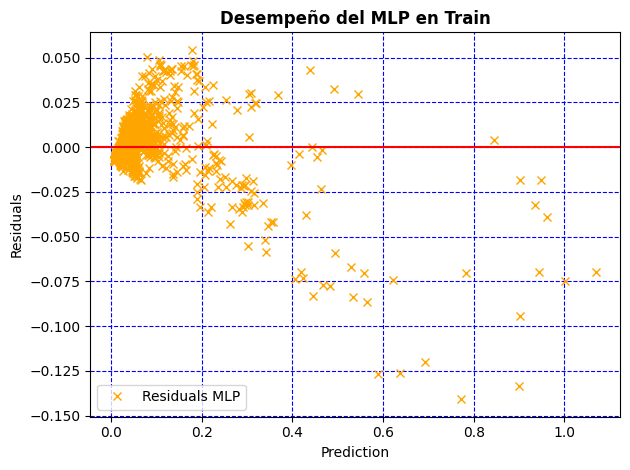

In [149]:
plt.figure()
plt.plot(mlp_train_results['Pred. Nacional'], mlp_train_results['Residuals'], 'x', color='orange', label='Residuals MLP')  
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño del MLP en Train", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

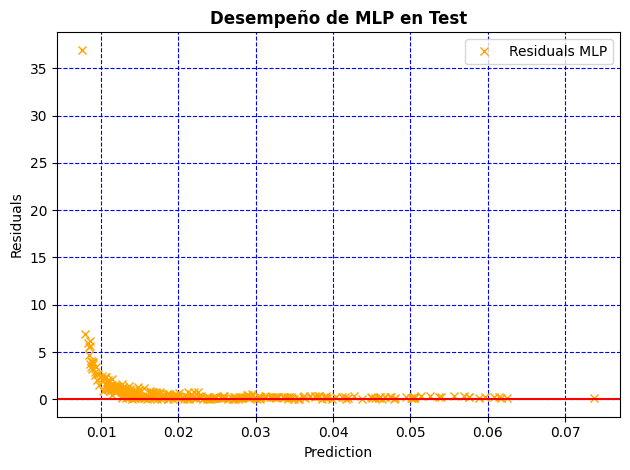

In [150]:
plt.figure()
plt.plot(mlp_test_results['Pred. Nacional'], mlp_test_results['Rel. Error'], 'x', color='orange', label='Residuals MLP') 
plt.grid(color='b', linestyle='dashed')
plt.axhline(y=0, color='red')
plt.title("Desempeño de MLP en Test", fontweight='bold')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

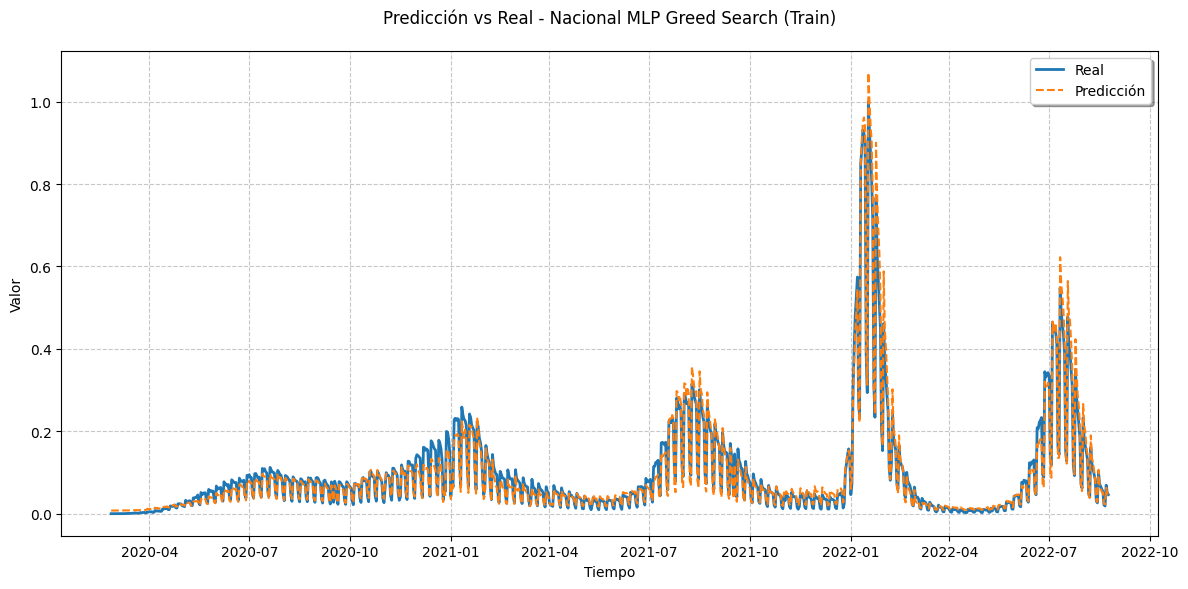

In [151]:
#Grafica de la predicción vs real MLP Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_mlp1.index, pred_train_df_mlp1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Greed Search (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

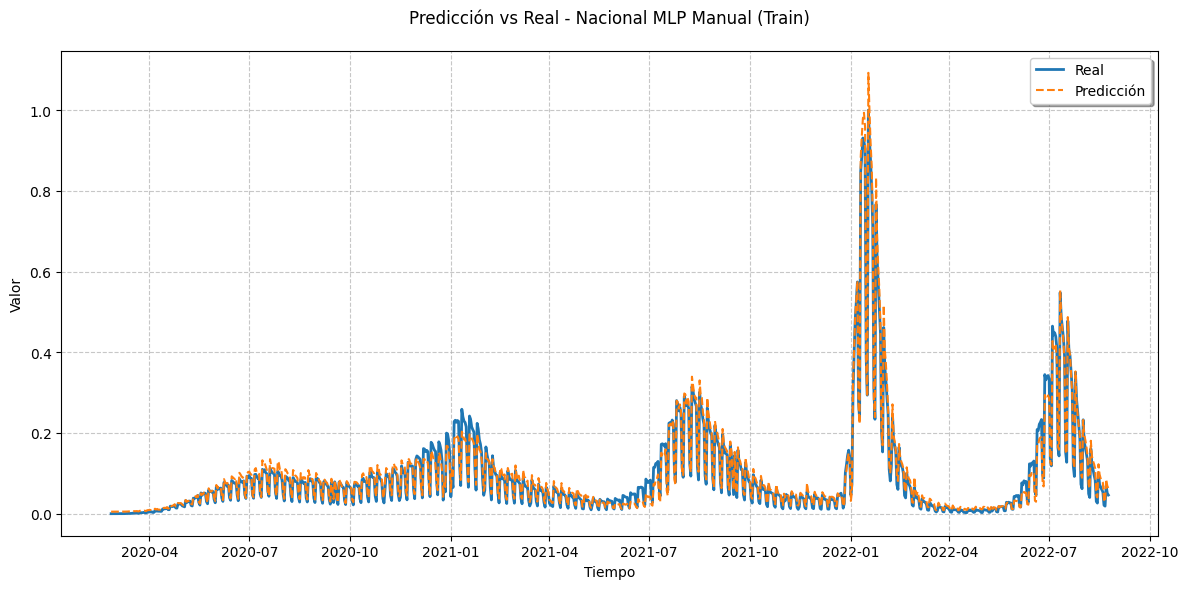

In [152]:
#Grafica de la predicción vs real MLP Train
plt.figure(figsize=(12, 6))  
plt.plot(Y_train.index, Y_train.values, label="Real", linewidth=2)  
plt.plot(pred_train_df_mlp2.index, pred_train_df_mlp2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Manual (Train)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

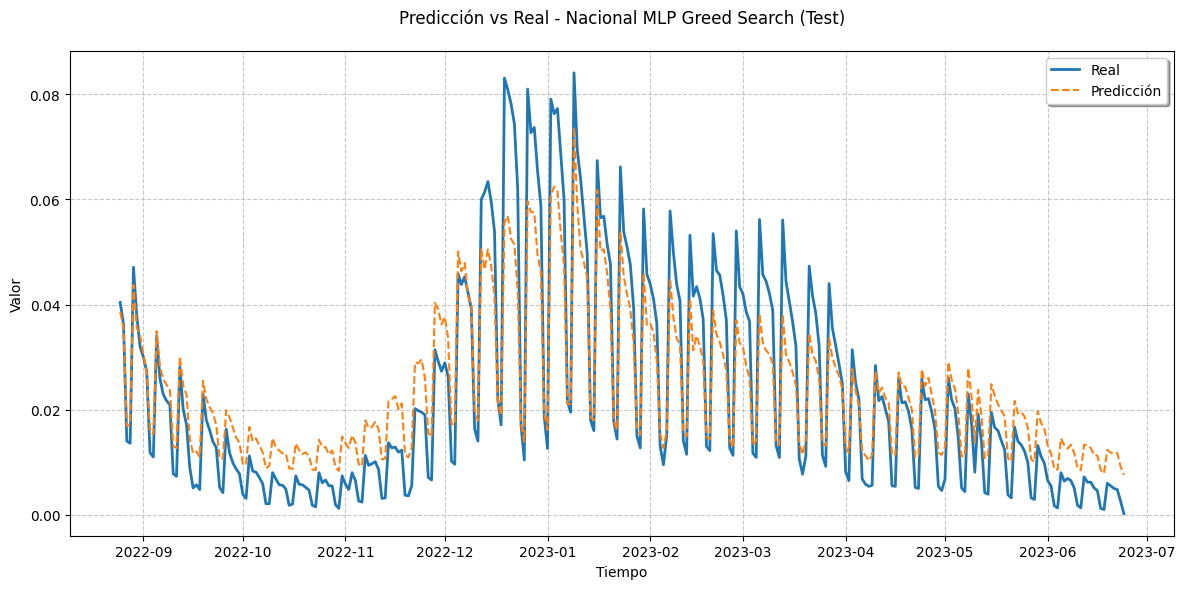

In [153]:
#Grafica de la predicción vs real MLP Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_mlp1.index, pred_test_df_mlp1.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Greed Search (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

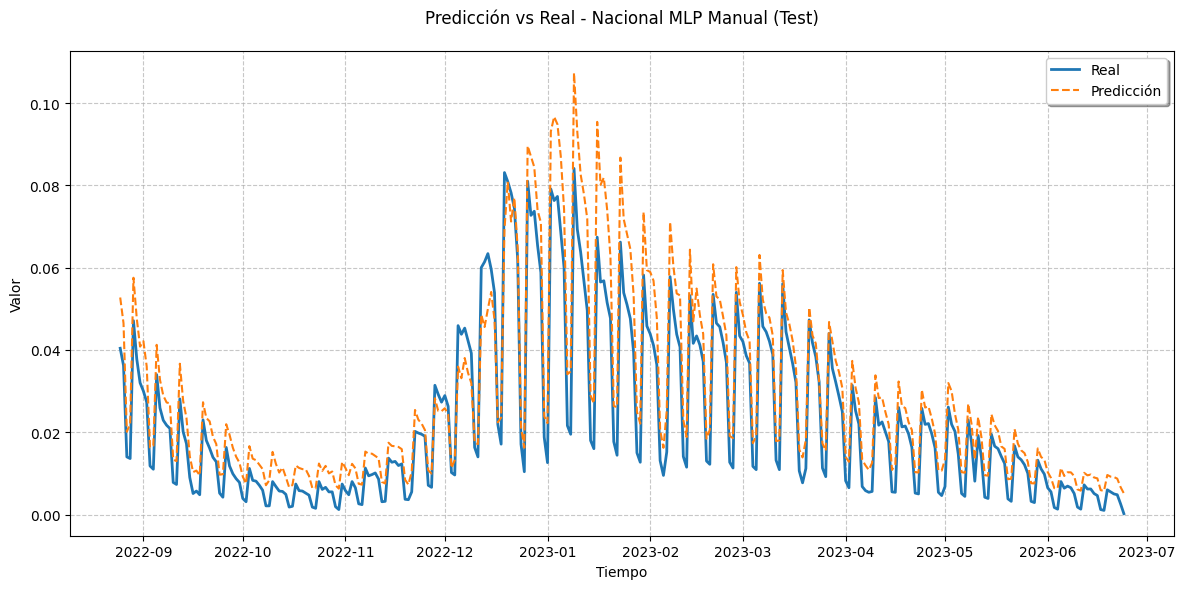

In [154]:
#Grafica de la predicción vs real MLP Test
plt.figure(figsize=(12, 6))  
plt.plot(Y_test.index, Y_test.values, label="Real", linewidth=2)  
plt.plot(pred_test_df_mlp2.index, pred_test_df_mlp2.values, label="Predicción", linestyle="--")  
plt.title("Predicción vs Real - Nacional MLP Manual (Test)", fontsize=12, pad=20)
plt.xlabel("Tiempo", fontsize=10)
plt.ylabel("Valor", fontsize=10)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [155]:
# Metricas de evaluación para Multi-layer Perceptron Regressor
mlp_model = Model(mlp_optimo)

# Carga de datos de entrenamiento (X_train, Y_train)
mlp_model.load_training(X_train, Y_train["Nacional"])

# Entrenamiento del modelo si es que no se ha hecho
mlp_model.run_training()

# PRedicciones para train y test
train_pred_mlp = mlp_model.predict(X_train)
test_pred_mlp = mlp_model.predict(X_test)

# Red pequeña: k≈50, Red mediana: k≈100–200, Red grande: k>500
# Resultados de metricas de train y test
train_metrics_mlp = mlp_model.regression_test_accuracy(X_train, Y_train["Nacional"], k=50)
test_metrics_mlp = mlp_model.regression_test_accuracy(X_test, Y_test["Nacional"], k=50)

print("Train metrics:", train_metrics_mlp)
print("Test metrics:", test_metrics_mlp)            

Train metrics: {'TSS': np.float64(14.479823970667978), 'RSS': np.float64(0.1266752821086909), 'SSR': np.float64(14.353148688559287), 'R2': np.float64(0.9912516006848358), 'MSE': np.float64(0.0001390508036319329), 'RMSE': 0.011791980479628216, 'MAPE': np.float64(inf), 'MAE': np.float64(0.008193139298792375), 'AIC': 117.76134239571049, 'BIC': 8431.018606109123, 'TIME SERIES R2': np.float64(0.991222664413672), 'APC': 0.46568419592980365}
Test metrics: {'TSS': np.float64(0.087023006018595), 'RSS': np.float64(0.015602799881640948), 'SSR': np.float64(0.07142020613695406), 'R2': np.float64(0.8207048848863374), 'MSE': np.float64(5.1324999610661015e-05), 'RMSE': 0.007164146816660098, 'MAPE': np.float64(104.6812076901356), 'MAE': np.float64(0.006289906099357757), 'AIC': 119.75466520529007, 'BIC': 3288.5604962744014, 'TIME SERIES R2': np.float64(0.8189119337352008), 'APC': 0.4538585363830926}


In [156]:
# Preparación de datos para comparar métricas de los modelos
models = ['Decision Tree', 'Random Forest', 'SVM', 'MLP']
train_metrics_list = [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp]
test_metrics_list = [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp]

# Lista de métricas a graficar
metrics_to_plot = ['MSE', 'RMSE', 'MAPE', 'MAE', 'R2', 'TSS', 'RSS', 'SSR', 'AIC', 'BIC', 'APC', 'TIME SERIES R2']

# Preparacion de dataframe para las métricas de train
train_metrics_df = pd.DataFrame(
    {model: {metric: train_metrics[metric] for metric in metrics_to_plot} 
     for model, train_metrics in zip(models, train_metrics_list)}
).T

# Preparación de dataframe para las métricas de test
test_metrics_df = pd.DataFrame(
    {model: {metric: test_metrics[metric] for metric in metrics_to_plot} 
     for model, test_metrics in zip(models, test_metrics_list)}
).T


In [157]:
# Creacion de DataFrame para recuento de métricas, cada fila representa un modelo y cada columna una métrica
train_metrics_recuento = pd.DataFrame(
    [train_metrics_dt, train_metrics_rf, train_metrics_svm, train_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

test_metrics_recuento = pd.DataFrame(
    [test_metrics_dt, test_metrics_rf, test_metrics_svm, test_metrics_mlp],
    index=['Decision Tree', 'Random Forest', 'SVM', 'MLP']
)

print("Recuento de métricas para Train:")
print(train_metrics_recuento)
print("\nRecuento de métricas para Test:")
print(test_metrics_recuento)

Recuento de métricas para Train:
                     TSS       RSS        SSR        R2       MSE      RMSE  \
Decision Tree  14.897313  0.014626  14.882686  0.999018  0.000016  0.004007   
Random Forest  14.971480  0.032963  14.938518  0.997798  0.000036  0.006015   
SVM            14.755372  0.062174  14.693198  0.995786  0.000068  0.008261   
MLP            14.479824  0.126675  14.353149  0.991252  0.000139  0.011792   

               MAPE       MAE           AIC           BIC  TIME SERIES R2  \
Decision Tree   0.0  0.001713    628.078948  12121.767149        0.999015   
Random Forest   inf  0.002571  11150.453844  47239.657245        0.997791   
SVM             inf  0.005299    585.184726  10667.158477        0.995772   
MLP             inf  0.008193    117.761342   8431.018606        0.991223   

                     APC  
Decision Tree   0.786143  
Random Forest  12.398900  
SVM             0.870642  
MLP             0.465684  

Recuento de métricas para Test:
                 

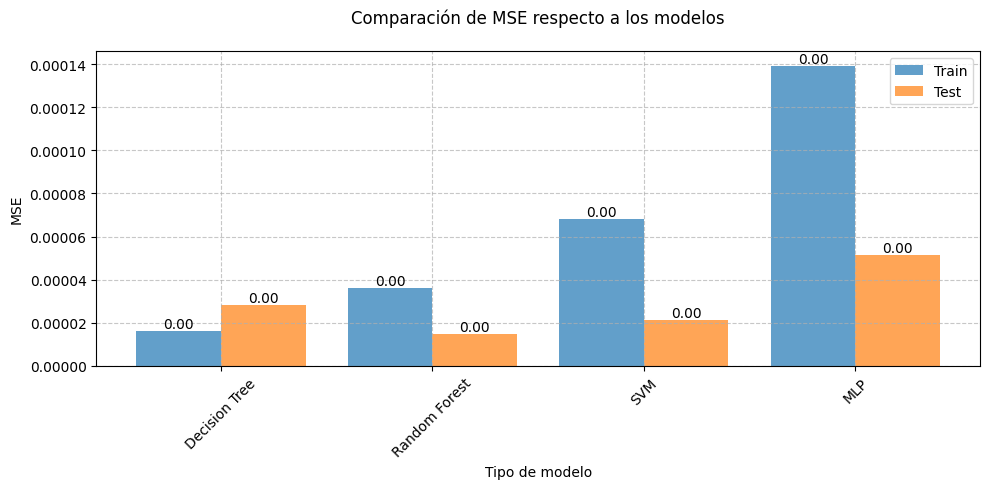

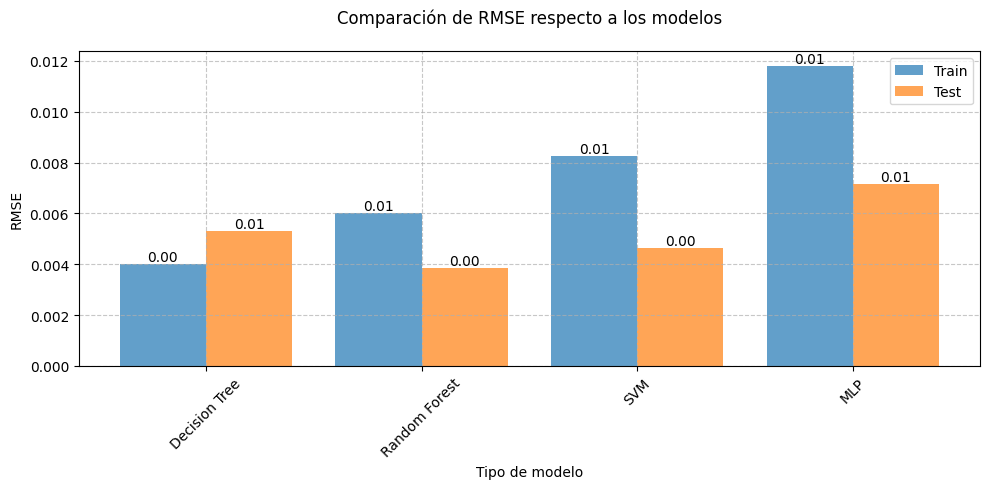

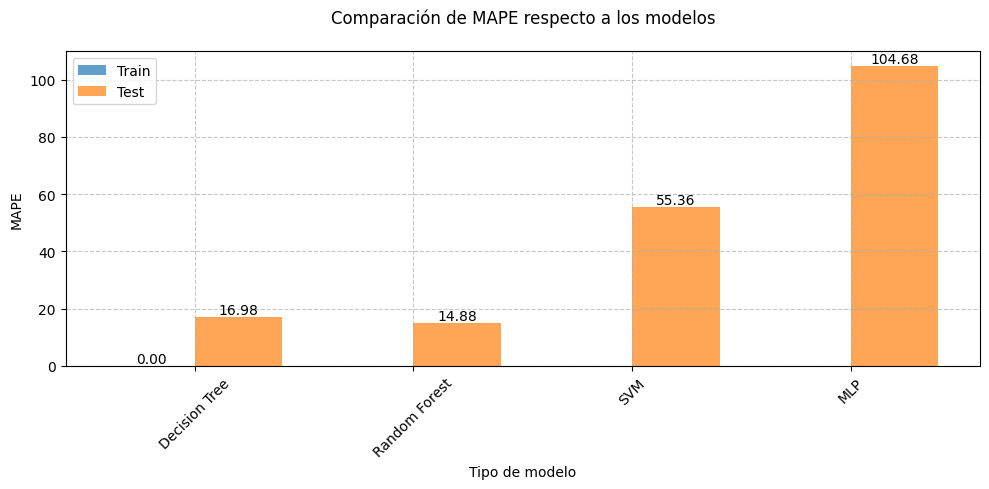

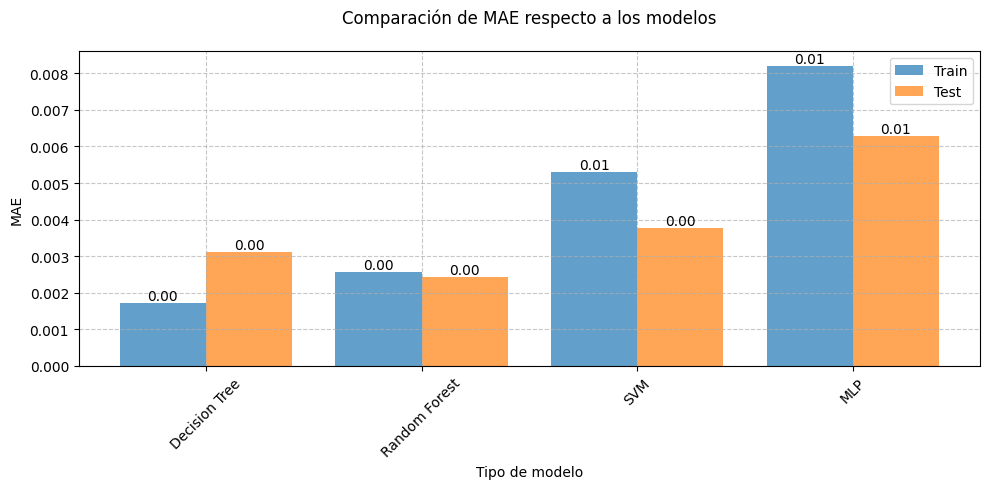

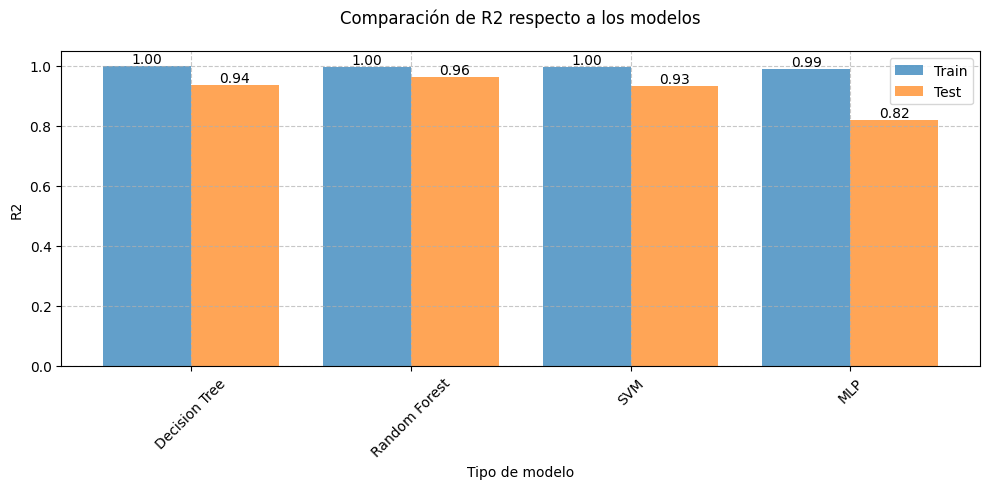

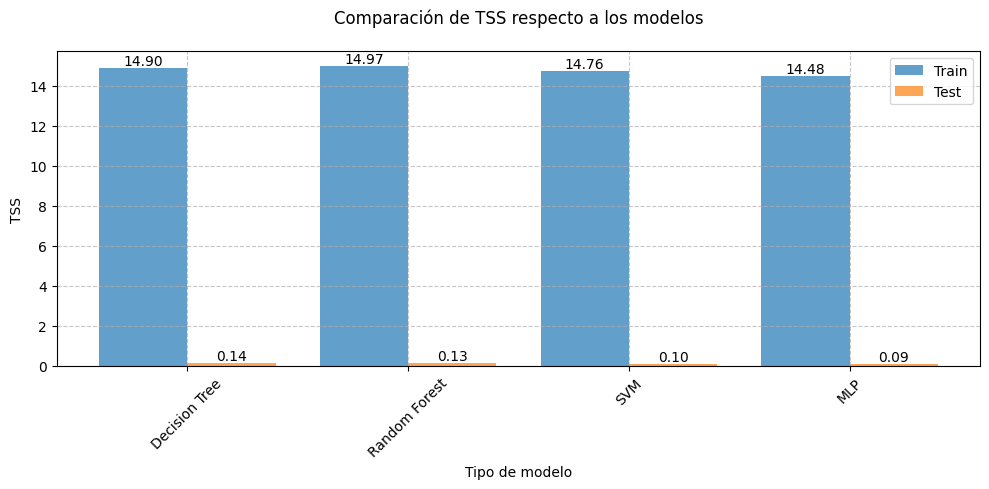

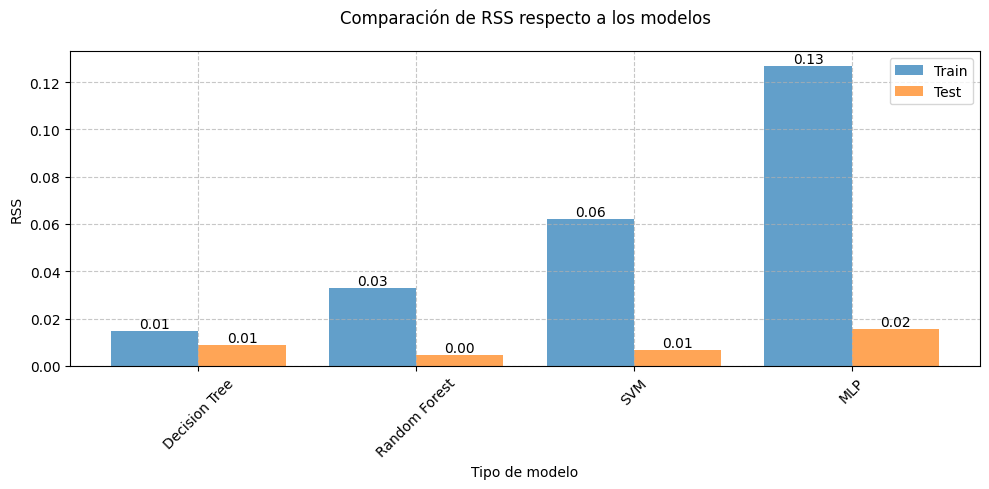

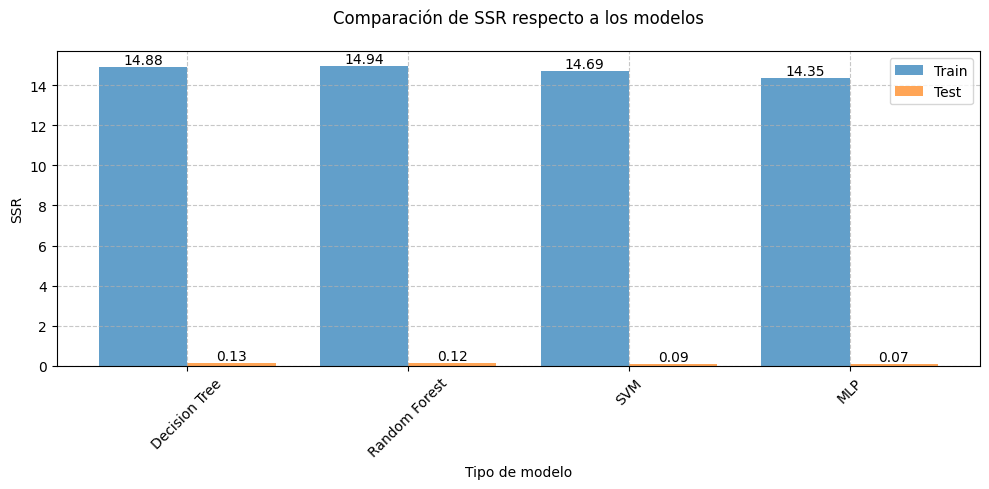

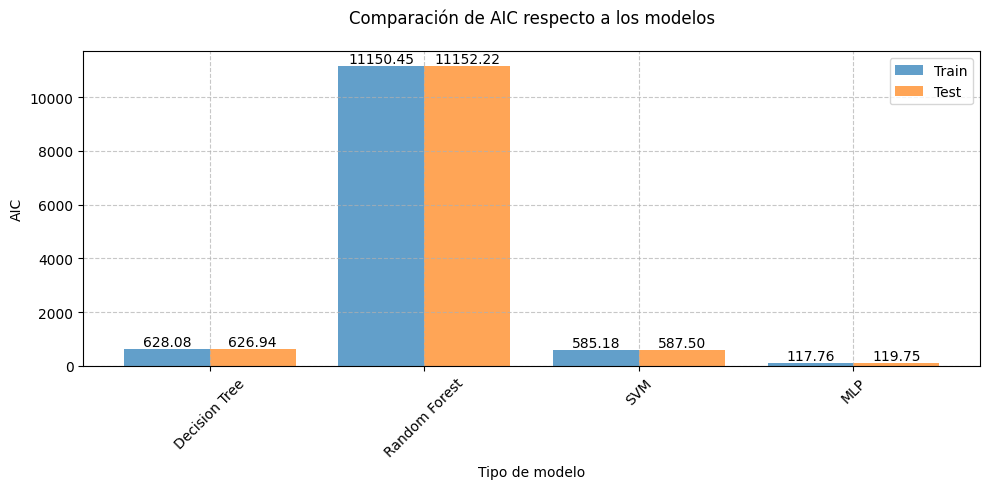

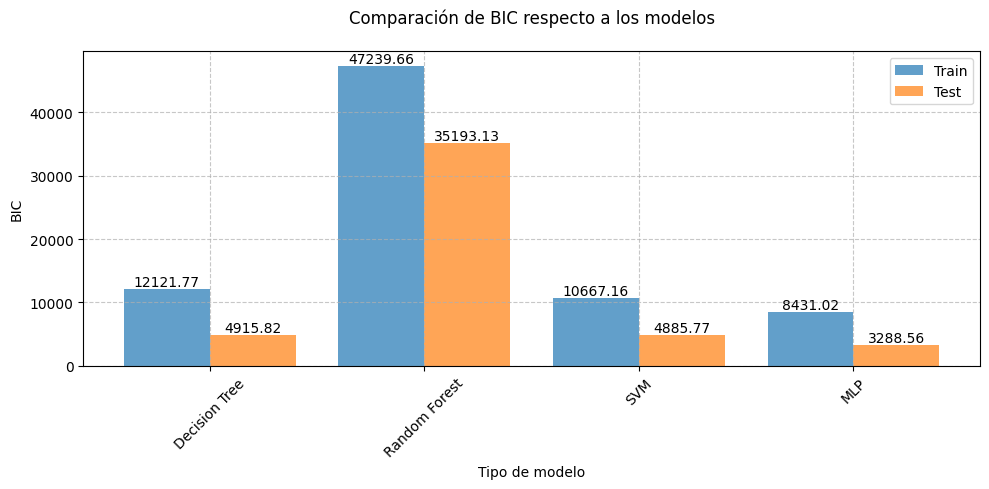

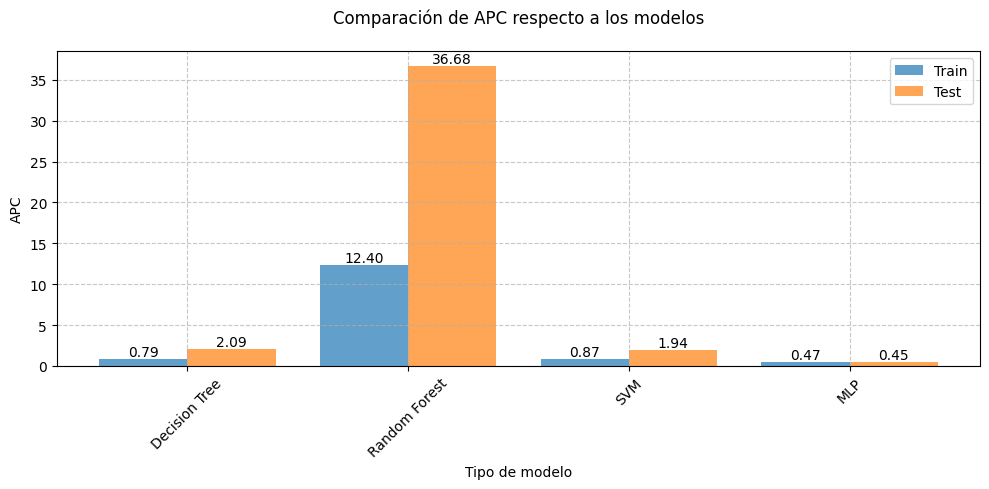

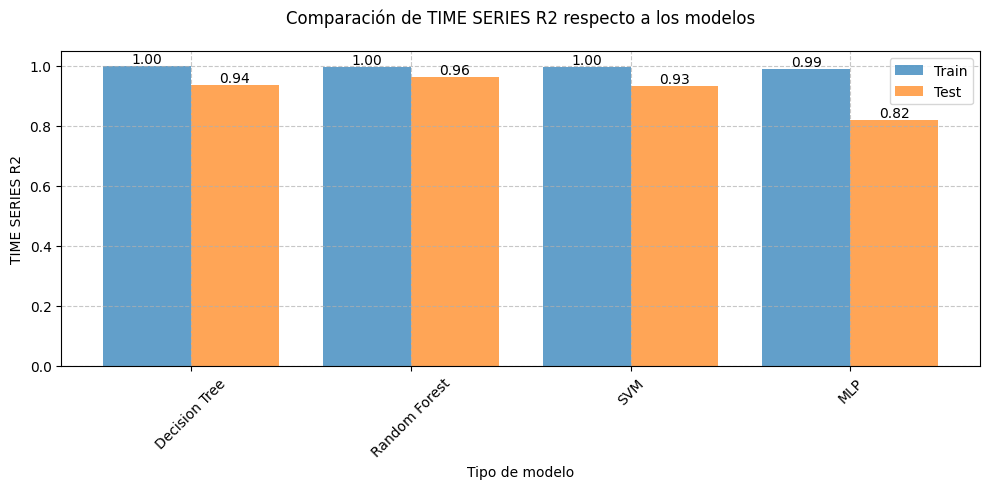

In [158]:
# Graficas de todas las métricas de train y test para cada modelo

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))  
    bars1 = plt.bar(np.arange(len(train_metrics_recuento)) - 0.2, 
                    train_metrics_recuento[metric], 0.4, 
                    label='Train', alpha=0.7)
    bars2 = plt.bar(np.arange(len(test_metrics_df)) + 0.2, 
                    test_metrics_df[metric], 0.4,
                    label='Test', alpha=0.7)
    
    plt.title(f'Comparación de {metric} respecto a los modelos', 
              fontsize=12, pad=20)
    plt.ylabel(metric, fontsize=10)
    plt.xlabel('Tipo de modelo', fontsize=10)
    plt.xticks(range(len(train_metrics_recuento)), 
               train_metrics_recuento.index.tolist(), rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(frameon=True, fancybox=True)
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()